<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

Project 1 done by - **Anand Ramchandani**

Project Group 3 Members:
Anand, Maybelle, Tiek Leong

# Problem Statement

We are a start-up aiming to set up a Sale Price recommendation tool where users can use to get a recommended Sale Price with just a few feature characteristics about their property which users would provide and upload onto our recommendation tool. Using our proprietary machine learning algorithm, the web application generates a quote estimate for their property Sale Price.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

# Background

- We are give the Ames Housing Dataset with over 70 columns of different features relating to houses. The task at hand is to create a regression model based on the dataset and use that model to create a web application recommendation tool to allow users to predict the sale price of their own homes
- We plan to accomplish this by cleaning the data and conducting exploratory data analysis to go through each of the 70 features to see which have the greatest impact and correlation with Sale Price
- After that we will generate a regression model using the training data. We will make use of train-test split, cross-validation for hyperparameters, and apply feature engineering and transformation in order to refine the regression model to improve the model consistently
- Using the engineered test data set, we submit target columns on to Kaggle to see how the model does against unknown data
- We can use this and other evaluation metrics to decide how successful our model is
- After which, we can use our model for our intended business problem statement
- The web application recommendation tool will be an ample tool used for the average homeowner to use a simplified version of the model produced for actual real world purposes

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Data Import & Cleaning Training and Testing Datasets

# Load/Import Data

In [2]:
# Read in the train data
train = pd.read_csv('../project_2/datasets/train.csv')

In [3]:
# Read in the test data
test = pd.read_csv('../project_2/datasets/test.csv')

# Display Data

In [4]:
train.shape

(2051, 81)

- Train dataset has 2051 rows and 81 features/columns

In [5]:
test.shape

(878, 80)

- Test dataset has 878 rows and 80 features/columns

In [6]:
pd.set_option('display.max_columns', 100)
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [7]:
pd.set_option('display.max_columns', 100)
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

### Summary statistics for Test and Training Data

In [9]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [10]:
test.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,878.000000,8.780000e+02,878.000000,718.000000,878.000000,878.000000,878.000000,878.000000,878.000000,877.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,833.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,1444.749431,7.162867e+08,58.268793,69.545961,10307.033030,6.050114,5.566059,1970.492027,1984.417995,106.236032,441.328018,53.896355,539.133257,1034.357631,1145.787016,348.398633,2.728929,1496.914579,0.439636,0.055809,1.539863,0.398633,2.879271,1.047836,6.454442,0.618451,1976.759904,1.742597,470.362187,93.430524,47.070615,24.064920,2.597950,14.830296,1.884966,48.498861,6.202733,2007.825740
std,850.838263,1.889103e+08,42.235407,23.533945,10002.674602,1.369065,1.128903,30.395895,20.450725,187.158908,438.457329,178.632355,426.172161,413.446291,375.264111,432.985566,32.572548,506.468967,0.529948,0.229683,0.559060,0.505927,0.830712,0.223966,1.596632,0.669571,25.689763,0.750391,212.734075,121.181702,68.180939,73.249463,24.962482,53.003794,29.916672,550.169317,2.642498,1.327861
min,2.000000,5.263021e+08,20.000000,21.000000,1477.000000,2.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,692.250000,5.284841e+08,20.000000,59.000000,7297.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,216.000000,789.000000,864.000000,0.000000,0.000000,1114.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,322.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,1433.000000,5.354542e+08,50.000000,68.000000,9446.000000,6.000000,5.000000,1972.000000,1992.000000,0.000000,373.000000,0.000000,452.000000,975.000000,1063.000000,0.000000,0.000000,1436.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,473.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.500000,9.071904e+08,70.000000,80.000000,11589.000000,7.000000,6.000000,1999.750000,2003.000000,172.000000,734.750000,0.000000,780.000000,1247.000000,1358.000000,720.000000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,170.750000,69.750000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2928.000000,1.007100e+09,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,2288.000000,1526.000000,2046.000000,2630.000000,2674.000000,2065.000000,481.000000,4476.000000,2.000000,1.000000,4.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1488.000000,690.000000,742.000000,1012.000000,360.000000,576.000000,555.000000,15500.000000,12.000000,2010.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

# Display DataTypes

In [12]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [13]:
test.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Feature     object
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
Length: 80, dtype: object

# Rename Columns

## Rename Columns to Lowercase and Remove Spaces for Training Dataset

In [14]:
# Renaming the columns to an easier convention for train
train.rename(str.lower, axis= 'columns', inplace=True)

In [15]:
# Removing spaces and replacing with underscore for train
train.columns = train.columns.str.replace(' ', '_')

## Rename Columns to Lowercase and Remove Spaces for Testing Dataset

In [16]:
# Renaming the columns to an easier convention for test
test.rename(str.lower, axis= 'columns', inplace=True)

In [17]:
# Removing spaces and replacing with underscore for test
test.columns = test.columns.str.replace(' ', '_')

# Check for Null Values

### Null Values in Training Dataset

In [18]:
#Check for all Null Values in train
pd.set_option('display.max_rows', 100)
train.isnull().sum().sort_values(ascending=False).reset_index()

,index,0
0,pool_qc,2042
1,misc_feature,1986
2,alley,1911
3,fence,1651
4,fireplace_qu,1000
5,lot_frontage,330
6,garage_finish,114
7,garage_qual,114
8,garage_yr_blt,114
9,garage_cond,114


In [19]:
# Isolating only the missing values
missing_train = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=["Missing in Training"])
missing_train[missing_train["Missing in Training"] >= 1]

,Missing in Training
pool_qc,2042
misc_feature,1986
alley,1911
fence,1651
fireplace_qu,1000
lot_frontage,330
garage_finish,114
garage_qual,114
garage_yr_blt,114
garage_cond,114


In [20]:
# Checking for Percentage of Null Values in the Columns
percent_missing = train.isnull().sum() * 100 / len(train)

missing_value_train = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})

missing_value_train.sort_values('percent_missing', inplace=True, ascending=False)

In [21]:
pd.set_option('display.max_rows', 100)
missing_value_train[missing_value_train["percent_missing"] >= 1]

,column_name,percent_missing
pool_qc,pool_qc,99.561190
misc_feature,misc_feature,96.830814
alley,alley,93.174061
fence,fence,80.497318
fireplace_qu,fireplace_qu,48.756704
lot_frontage,lot_frontage,16.089712
garage_finish,garage_finish,5.558264
garage_qual,garage_qual,5.558264
garage_yr_blt,garage_yr_blt,5.558264
garage_cond,garage_cond,5.558264


### Null Values in Testing Dataset

In [22]:
#Check for all Null Values in test
pd.set_option('display.max_rows', 100)
test.isnull().sum().sort_values().reset_index()

,index,0
0,id,0
1,bsmt_unf_sf,0
2,yr_sold,0
3,heating,0
4,heating_qc,0
5,central_air,0
6,1st_flr_sf,0
7,2nd_flr_sf,0
8,low_qual_fin_sf,0
9,gr_liv_area,0


In [23]:
# Isolating only the missing values
missing_test = pd.DataFrame(test.isna().sum().sort_values(ascending=False), columns=["Missing in Test"])
missing_test[missing_test["Missing in Test"] >= 1]

,Missing in Test
pool_qc,874
misc_feature,837
alley,820
fence,706
fireplace_qu,422
lot_frontage,160
garage_yr_blt,45
garage_finish,45
garage_qual,45
garage_cond,45


In [24]:
# Checking for Percentage of Null Values in the Columns
percent_missing = test.isnull().sum() * 100 / len(train)

missing_value_test = pd.DataFrame({'column_name': test.columns,
                                 'percent_missing': percent_missing})

missing_value_test.sort_values('percent_missing', inplace=True, ascending=False)

In [25]:
pd.set_option('display.max_rows', 100)
missing_value_test[missing_value_test["percent_missing"] >= 1]

,column_name,percent_missing
pool_qc,pool_qc,42.613359
misc_feature,misc_feature,40.809361
alley,alley,39.980497
fence,fence,34.422233
fireplace_qu,fireplace_qu,20.575329
lot_frontage,lot_frontage,7.801073
garage_yr_blt,garage_yr_blt,2.194052
garage_finish,garage_finish,2.194052
garage_qual,garage_qual,2.194052
garage_cond,garage_cond,2.194052


# Missing Data: Analysis of Columns with Large Null Values

We can see that the missing data in both test and training datasets are comparable, here we will analyse which datasets with large missing values we should keep and/or drop, plus giving justifications for each decision

- **Pool QC** : Dropping as its more than 99% missing values, feature Pool Area could have a greater impact on price and will also be able to indicate the existence of a pool with the house
- **Misc Feature**: Dropping this feature, feature Misc Value could have a greater impact on price in comparison
- **Alley**: Dropping this feature with 93% missing values, as it is difficult to ascertain any meaning from so much missing data, and feature Street could provide us with more meaning, it would also indicate if the house has alley access
- **Fence**: Keeping this feature as even though it is 80% missing, there is no alternative feature tha could provide more meaningful feature with respect to fences
- **Fireplace Qu**: Keeping this even though there is a high 49% of missing values, as it still has a lot of values and we can do some more analysis before deciding to drop this feature
- Removing Columns for **ID** and **PID** as they show a unique string of unknown data and presumably does not have any relation to the taget price. PID refers to Parcel identification number  - can be used with city web site for parcel review, obtained from Data Dictionary, however this information does not seem to contribute to the value of house price

## Dropping Columns with Missing Values listed above

### Dropping Columns for ID, PID, Pool QC, Misc Feature, and Alley in Training Dataset

In [26]:
# Dropping Columns for ID, PID, Pool QC, Misc Feature, and Alley for train
#train.drop(['id', 'pid','pool_qc', 'misc_feature', 'alley'], axis = 1, inplace = True)
train.drop(['pid','pool_qc', 'misc_feature', 'alley'], axis = 1, inplace = True)

In [27]:
train.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,0,3,2010,WD,130500
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,0,3,2010,WD,138500


### Dropping Columns for ID, PID, Pool QC, Misc Feature, and Alley in Testing Dataset

In [28]:
# Dropping Columns for Pool QC, Misc Feature, and Alley for test
test.drop(['pid','pool_qc', 'misc_feature', 'alley'], axis = 1, inplace = True)

In [29]:
# Checking if they have dropped
test.head()

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type
0,2658,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,0,4,2006,WD
1,2718,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,0,8,2006,WD
2,2414,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,0,9,2006,New
3,1989,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,0,7,2007,WD
4,625,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,0,7,2009,WD


In [30]:
# Formula to see Percentage of Null Values
def percent_null(df):
    for i in df:
        if df[i].isnull().sum() > 0:
            print(i)
            print("Number of Null Values: " + str(df[i].isnull().sum()))
            print("Percentage of Nulls = " + str(np.round((df[i].isnull().sum()*100 / len(df)), 2)) + "%")
            print("\n")

percent_null(train)

lot_frontage
Number of Null Values: 330
Percentage of Nulls = 16.09%


mas_vnr_type
Number of Null Values: 22
Percentage of Nulls = 1.07%


mas_vnr_area
Number of Null Values: 22
Percentage of Nulls = 1.07%


bsmt_qual
Number of Null Values: 55
Percentage of Nulls = 2.68%


bsmt_cond
Number of Null Values: 55
Percentage of Nulls = 2.68%


bsmt_exposure
Number of Null Values: 58
Percentage of Nulls = 2.83%


bsmtfin_type_1
Number of Null Values: 55
Percentage of Nulls = 2.68%


bsmtfin_sf_1
Number of Null Values: 1
Percentage of Nulls = 0.05%


bsmtfin_type_2
Number of Null Values: 56
Percentage of Nulls = 2.73%


bsmtfin_sf_2
Number of Null Values: 1
Percentage of Nulls = 0.05%


bsmt_unf_sf
Number of Null Values: 1
Percentage of Nulls = 0.05%


total_bsmt_sf
Number of Null Values: 1
Percentage of Nulls = 0.05%


bsmt_full_bath
Number of Null Values: 2
Percentage of Nulls = 0.1%


bsmt_half_bath
Number of Null Values: 2
Percentage of Nulls = 0.1%


fireplace_qu
Number of Null Values: 1

In [31]:
percent_null(test)

lot_frontage
Number of Null Values: 160
Percentage of Nulls = 18.22%


mas_vnr_type
Number of Null Values: 1
Percentage of Nulls = 0.11%


mas_vnr_area
Number of Null Values: 1
Percentage of Nulls = 0.11%


bsmt_qual
Number of Null Values: 25
Percentage of Nulls = 2.85%


bsmt_cond
Number of Null Values: 25
Percentage of Nulls = 2.85%


bsmt_exposure
Number of Null Values: 25
Percentage of Nulls = 2.85%


bsmtfin_type_1
Number of Null Values: 25
Percentage of Nulls = 2.85%


bsmtfin_type_2
Number of Null Values: 25
Percentage of Nulls = 2.85%


electrical
Number of Null Values: 1
Percentage of Nulls = 0.11%


fireplace_qu
Number of Null Values: 422
Percentage of Nulls = 48.06%


garage_type
Number of Null Values: 44
Percentage of Nulls = 5.01%


garage_yr_blt
Number of Null Values: 45
Percentage of Nulls = 5.13%


garage_finish
Number of Null Values: 45
Percentage of Nulls = 5.13%


garage_qual
Number of Null Values: 45
Percentage of Nulls = 5.13%


garage_cond
Number of Null Values: 4

### Garage Type Null Values

- Out of all the Garage Features, only Garage Type has 113 Null Values, the rest have 114 Null Values which looks odd
- I intend to find and drop that row

### Garage Type Null Values Training Dataset

In [32]:
# Finding the suspicious row for Garage Type Null Value
train[train['garage_type'].notnull() & train['garage_cond'].isnull() & train['garage_yr_blt'].isnull() & train['garage_qual'].isnull() & train['garage_finish'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
1712,2237,70,RM,50.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174,0,212,0,0,0,MnPrv,0,3,2007,WD,150909


In [33]:
# Removing that row
train.drop(index=1712, axis=0, inplace=True)

In [34]:
# Checking if that suspicious row is still there
train[train['garage_type'].notnull() & train['garage_cond'].isnull() & train['garage_yr_blt'].isnull() & train['garage_qual'].isnull() & train['garage_finish'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice


### Garage Type Null Values Testing Dataset

In [35]:
# Finding the suspicious row for Garage Type Null Value
test[test['garage_type'].notnull() & test['garage_cond'].isnull() & test['garage_yr_blt'].isnull() & test['garage_qual'].isnull() & test['garage_finish'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type
764,1357,60,RM,57.0,8094,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,MnPrv,1000,9,2008,WD


In [36]:
# Removing that row
#test.drop(index=764, axis=0, inplace=True)

In [37]:
# Checking if that suspicious row is still there
test[test['garage_type'].notnull() & test['garage_cond'].isnull() & test['garage_yr_blt'].isnull() & test['garage_qual'].isnull() & test['garage_finish'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type
764,1357,60,RM,57.0,8094,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,MnPrv,1000,9,2008,WD


## Changing DataType for MS Subclass

### Changing DataType for MS Subclass in Training Dataset

In [38]:
train['ms_subclass'].dtype

dtype('int64')

In [39]:
# Taking a look at the data dictionary, we see that MS Subclass is meant to be nominal as it identifies the type of dwelling involved in the sale
# From data types we see MS SubClass is int64 where it should be object
# Changing DataType for MS Subclass
train['ms_subclass'] = train['ms_subclass'].astype('object')
train['ms_subclass'].dtype

dtype('O')

### Changing DataType for MS Subclass in Testing Dataset

In [40]:
test['ms_subclass'].dtype

dtype('int64')

In [41]:
test['ms_subclass'] = test['ms_subclass'].astype('object')
test['ms_subclass'].dtype

dtype('O')

# Taking Care of Null Values

From the Data Dictionary (http://jse.amstat.org/v19n3/decock/DataDocumentation.txt), we can see what the "NA" would indicate  
- Bsmt Qual: NA - No Basement
- Bsmt Cond: NA - No Basement
- Bsmt Exposure: NA - No Basement
- BsmtFin Type 1: NA - No Basement
- BsmtFinType 2: NA - No Basement
- FireplaceQu: NA - No Fireplace
- Garage Type: NA - No Garage
- Garage Finish: NA - No Garage
- Garage Qual: NA - No Garage
- Garage Cond: NA - No Garage
- Fence: NA - No Fence
- Mas Vnr Type: NA - None

We can assume the following Null Values below are due to there being no, lot frontage, no basements, no masonry veneers and no garages:  
- Bsmt Unf SF (Continuous): Unfinished square feet of basement area
- Total Bsmt SF (Continuous): Total square feet of basement area
- Bsmt Half Bath (Discrete): Basement half bathrooms
- Bsmt Full Bath (Discrete): Basement full bathrooms
- Mas Vnr Area (Continuous): Masonry veneer area in square feet
- Garage Yr Blt (Discrete): Year garage was built
- Lot Frontage (Continuous): Linear feet of street connected to property

### Missing Values in Training Dataset

In [42]:
# Missing Values in Train
missing_train = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=["Missing in Training"])
missing_train[missing_train["Missing in Training"] >= 1]

,Missing in Training
fence,1651
fireplace_qu,999
lot_frontage,330
garage_qual,113
garage_type,113
garage_yr_blt,113
garage_finish,113
garage_cond,113
bsmt_exposure,58
bsmtfin_type_2,56


### Missing Values in Testing Dataset

In [43]:
# Missing Values in Test
missing_test = pd.DataFrame(test.isna().sum().sort_values(ascending=False), columns=["Missing in Testing"])
missing_test[missing_test["Missing in Testing"] >= 1]

,Missing in Testing
fence,706
fireplace_qu,422
lot_frontage,160
garage_qual,45
garage_yr_blt,45
garage_finish,45
garage_cond,45
garage_type,44
bsmtfin_type_2,25
bsmtfin_type_1,25


## Filling in Null Values

### Null Values in Masonry Veneer - Mas Vnr Type and Mas Vnr Area

In [44]:
# Checking for Null Values in Masonry Veneer
train[train['mas_vnr_type'].isnull()][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [45]:
# Checking for Null Values in Masonry Veneer
test[test['mas_vnr_type'].isnull()][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area
865,NaN,NaN


We can see that the Null values for 'Mas Vnr Type' match rows where 'Mas Vnr Area' is null, so we can presume Masonry Veneery does not apply for these houses. So we will convert 'Mas Vnr Type'as 'None and 'Mas Vnr Area' as '0'

In [46]:
# Filling Null Values for Mas Vnr Type and Mas Vnr Area for training data
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)

# Filling Null Values for Mas Vnr Type and Mas Vnr Area for testing data
test['mas_vnr_type'] = test['mas_vnr_type'].fillna('None')
test['mas_vnr_area'] = test['mas_vnr_area'].fillna(0)

In [47]:
# Checking for Null Values in Masonry Veneer after filling in missing data
train[train['mas_vnr_type'].isnull()][['mas_vnr_type','mas_vnr_area']]

,mas_vnr_type,mas_vnr_area


Null values in Masonry Veneer are now taken care of

### Filling in Null Values for Fireplace, Fence and Mas Vnr Type Columns in Training Dataset

In [48]:
train['fireplace_qu'].fillna(value='NA', inplace=True)
train['fence'].fillna(value='No Fence', inplace=True)

### Filling in Null Values for Fireplace, Fence and Mas Vnr Type Columns in Testing Dataset

In [49]:
test['fireplace_qu'].fillna(value='NA', inplace=True)
test['fence'].fillna(value='No Fence', inplace=True)

### Null Values for Garage Columns

#### Null Values for Garage Columns in Training Dataset

In [50]:
# We can see below that there is missing data for all the garage entries below, which indicates that these houses do not have garages
pd.set_option('display.max_columns', 100)
train[train['garage_type'].isnull() & train['garage_cond'].isnull() & train['garage_yr_blt'].isnull() & train['garage_qual'].isnull() & train['garage_finish'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,2243,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,No Fence,0,6,2007,WD,119600
53,330,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,No Fence,0,3,2010,WD,76000
65,2278,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,No Fence,0,12,2007,New,147000
79,2235,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,No Fence,0,9,2007,WD,129850
101,2084,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,No Fence,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,90,RL,94.0,9400,Pave,Reg,Low,AllPub,Corner,Gtl,Mitchel,Norm,Norm,Duplex,2Story,6,5,1971,1971,Mansard,CompShg,MetalSd,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0.0,Unf,0.0,912.0,912.0,GasA,TA,Y,SBrkr,912,912,0,1824,0.0,0.0,2,2,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,128,0,0,0,0,0,No Fence,0,4,2010,WD,139000
2010,2880,30,C (all),69.0,12366,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,1Story,3,5,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,SBrkr,729,0,0,729,0.0,0.0,1,0,2,1,TA,5,Mod,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,23,0,0,0,No Fence,0,10,2006,WD,51689
2027,2628,90,RL,75.0,8512,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1960,1960,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,Fa,No,Unf,0.0,Unf,0.0,1556.0,1556.0,GasA,TA,Y,SBrkr,1556,0,0,1556,0.0,0.0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,9,2006,WD,119000
2039,2288,160,RM,21.0,1495,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,ALQ,384.0,Unf,0.0,162.0,546.

#### Null Values for Garage Columns in Testing Dataset

In [51]:
# We can see below that there is missing data for all the garage entries below, which indicates that these houses do not have garages
pd.set_option('display.max_columns', 100)
test[test['garage_type'].isnull() & test['garage_cond'].isnull() & test['garage_yr_blt'].isnull() & test['garage_qual'].isnull() & test['garage_finish'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type
29,1904,50,RL,51.0,3500,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,144,Unf,0,226,370,GasA,TA,N,FuseA,442,228,0,670,1,0,1,0,2,1,Fa,4,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,21,0,0,0,0,MnPrv,2000,7,2007,WD
45,979,160,RM,21.0,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,6,1970,2008,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,TA,Y,SBrkr,798,546,0,1344,0,0,1,1,3,1,TA,6,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,5,2009,WD
66,2362,20,RL,NaN,8125,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,4,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,614,Unf,0,244,858,GasA,TA,Y,SBrkr,858,0,0,858,0,0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,6,2006,WD
68,2188,30,RH,70.0,4270,Pave,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,3,6,1931,2006,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Rec,544,Unf,0,0,544,GasA,Ex,Y,SBrkr,774,0,0,774,0,0,1,0,3,1,Gd,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,286,0,0,0,No Fence,0,5,2007,WD
105,1988,30,RM,40.0,3880,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,9,1945,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,329,Unf,0,357,686,GasA,Gd,Y,SBrkr,866,0,0,866,0,0,1,0,2,1,Gd,4,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,58,42,0,0,0,0,No Fence,0,8,2007,WD
109,217,90,RL,72.0,10773,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,3,1967,1967,Gable,Tar&Grv,Plywood,Plywood,BrkFace,72.0,Fa,Fa,CBlock,TA,TA,No,ALQ,704,Unf,0,1128,1832,GasA,TA,N,SBrkr,1832,0,0,1832,2,0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,58,0,0,0,0,No Fence,0,5,2010,WD
113,2908,20,RL,90.0,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,Ex,Y,SBrkr,1140,0,0,1140,0,0,1,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,No Fence,0,7,2006,WD
144,1507,50,RL,57.0,8050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,8,1947,1993,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,SBrkr,929,208,0,1137,0,0,1,1,4,1,TA,8,Min1,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,4,2008,WD
152,1368,50,RM,60.0,5586,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,6,7,1920,1998,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,901,901,GasA,Gd,Y,SBrkr,1088,110,0,1198,0,0,1,0,4,1,TA,7,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,98,0,0,0,0,MnPrv,0,9,2008,ConLD
156,332,160,RM,21.0,1900,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,4,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,546,546,GasA,Ex,Y,SBrkr,546,546,0,1092,0,0,1,1,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,No Fence,0,6,2010,WD


#### Filling Null Values in Garage Columns in Training Dataset

In [52]:
# Replacing Null Values with Values given in Data Dictionary for training set
train['garage_type'].fillna(value='NA', inplace=True)
train['garage_finish'].fillna(value='NA', inplace=True)
train['garage_qual'].fillna(value='NA', inplace=True)
train['garage_cond'].fillna(value='NA', inplace=True)
train['garage_yr_blt'].fillna(value='0', inplace=True)

#### Filling Null Values in Garage Columns in Test Dataset

In [53]:
# Replacing Null Values with Values given in Data Dictionary for training set
test['garage_type'].fillna(value='NA', inplace=True)
test['garage_finish'].fillna(value='NA', inplace=True)
test['garage_qual'].fillna(value='NA', inplace=True)
test['garage_cond'].fillna(value='NA', inplace=True)
test['fence'].fillna(value='NA', inplace=True)
test['garage_yr_blt'].fillna(value='0', inplace=True)

In [54]:
train['garage_yr_blt'].isnull

<bound method Series.isnull of 0       1976.0
1       1997.0
2       1953.0
3       2007.0
4       1957.0
         ...  
2046    2007.0
2047    1961.0
2048    1929.0
2049    1956.0
2050    1999.0
Name: garage_yr_blt, Length: 2050, dtype: object>

In [55]:
test['garage_yr_blt'].isnull

<bound method Series.isnull of 0      1910.0
1      1977.0
2      2006.0
3      1935.0
4      1963.0
        ...  
873    1974.0
874    1966.0
875    1968.0
876    1974.0
877    1955.0
Name: garage_yr_blt, Length: 878, dtype: object>

#### Checking for Null Values in Garage Columns in Training and Test Datasets

In [56]:
# Checking for Null Values in Garage columns in Training Set
pd.set_option('display.max_columns', 100)
train[train['garage_type'].isnull() & train['garage_cond'].isnull() & train['garage_yr_blt'].isnull() & train['garage_qual'].isnull() & train['garage_finish'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [57]:
# Checking for Null Values in Garage columns in Test Set
pd.set_option('display.max_columns', 100)
test[test['garage_type'].isnull() & test['garage_cond'].isnull() & test['garage_yr_blt'].isnull() & test['garage_qual'].isnull() & test['garage_finish'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type


In [58]:
train.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'lot_shape', 'land_contour', 'utilities', 'lot_config', 'land_slope',
       'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'garage_

#### Null Values for Garage Columns - Garage Area & Garage Cars

In [59]:
train[train['garage_area'] == 0].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [60]:
test[test['garage_area'] == 0].index

Int64Index([ 29,  45,  66,  68, 105, 109, 113, 144, 152, 156, 180, 218, 230,
            231, 256, 282, 305, 314, 320, 337, 341, 350, 359, 395, 482, 496,
            527, 529, 536, 555, 566, 591, 596, 610, 615, 618, 629, 674, 698,
            711, 779, 803, 813, 859],
           dtype='int64')

In [61]:
train[train['garage_cars'] == 0].index

Int64Index([  28,   53,   65,   79,  101,  103,  114,  120,  134,  136,
            ...
            1841, 1893, 1927, 1952, 1982, 1991, 2010, 2027, 2039, 2042],
           dtype='int64', length=113)

In [62]:
test[test['garage_cars'] == 0].index

Int64Index([ 29,  45,  66,  68, 105, 109, 113, 144, 152, 156, 180, 218, 230,
            231, 256, 282, 305, 314, 320, 337, 341, 350, 359, 395, 482, 496,
            527, 529, 536, 555, 566, 591, 596, 610, 615, 618, 629, 674, 698,
            711, 779, 803, 813, 859],
           dtype='int64')

In [63]:
sum(train[train['garage_area'] == 0].index == train[train['garage_cars'] == 0].index) 

113

In [64]:
sum(test[test['garage_area'] == 0].index == test[test['garage_cars'] == 0].index) 

44

- We can see 113 null values in 'Garage Type' (44 in test data) which are the same houses where the 'Garage Area' is 0. We can fill null values of 'Garage Type' with NA, which represents 'No Garage'.

In [65]:
train['garage_cars'] = train['garage_cars'].fillna(0)
train['garage_area'] = train['garage_area'].fillna(0)

In [66]:
# Checking for Null Values
train[train['garage_cars'].isnull()][['garage_type','garage_yr_blt','garage_finish','garage_cars','garage_area','garage_qual','garage_cond']]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond


In [67]:
# Doing the same with test data
test['garage_cars'] = test['garage_cars'].fillna(0)
test['garage_area'] = test['garage_area'].fillna(0)

In [68]:
test[test['garage_cars'].isnull()][['garage_type','garage_yr_blt','garage_finish','garage_cars','garage_area','garage_qual','garage_cond']]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond


### Null Values in Basement Columns

#### Null Values for Basement Columns - Total Bsmt Sf

Looking for common null values amongst Basment columns: bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_sf_1, bsmtfin_sf_2, bsmtfin_type_1, bsmtfin_type_2

In [69]:
# Checking for Null Values in Basement Columns
train[train['total_bsmt_sf'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
test[test['total_bsmt_sf'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


- From the above, we can surmise that the house has no basement, so will fill all the rows with 0

In [71]:
# Filling Null Values for Basement Columns for training data
train['total_bsmt_sf'] = train['total_bsmt_sf'].fillna(0)
train['bsmtfin_sf_1'] = train['bsmtfin_sf_1'].fillna(0)
train['bsmtfin_sf_2'] = train['bsmtfin_sf_2'].fillna(0)
train['bsmt_unf_sf'] = train['bsmt_unf_sf'].fillna(0)

# Filling Null Values for Basement Columns for testing data
test['total_bsmt_sf'] = test['total_bsmt_sf'].fillna(0)
test['bsmtfin_sf_1'] = test['bsmtfin_sf_1'].fillna(0)
test['bsmtfin_sf_2'] = test['bsmtfin_sf_2'].fillna(0)
test['bsmt_unf_sf'] = test['bsmt_unf_sf'].fillna(0)

In [72]:
# Checking for Null Values in Basement Columns after filling in missing data for Train dataset
train[train['total_bsmt_sf'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


In [73]:
# Checking for Null Values in Basement Columns after filling in missing data for Test dataset
test[test['total_bsmt_sf'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


#### Null Values for Basement Columns - Bsmt Full Bath & Bsmt Half Bath

In [74]:
# Checking for Null Values in Basement Columns Train dataset
train[train['bsmt_full_bath'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN
1327,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [75]:
test[test['bsmt_full_bath'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


In [76]:
# Checking for Null Values in Basement Columns Train dataset
train[train['bsmt_half_bath'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN
1327,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN


In [77]:
test[test['bsmt_half_bath'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


- From the above, we can surmise that the 2 houses above have no basement, so will fill all the rows with 0

In [78]:
train['bsmt_full_bath'] = train['bsmt_full_bath'].fillna(0)
train['bsmt_half_bath'] = train['bsmt_half_bath'].fillna(0)

In [79]:
# Doing the same with test data
test['bsmt_full_bath'] = test['bsmt_full_bath'].fillna(0)
test['bsmt_half_bath'] = test['bsmt_half_bath'].fillna(0)

In [80]:
# Checking for Null Values in Basement Columns after filling in missing data in Train dataset
train[train['bsmt_full_bath'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


In [81]:
# Checking for Null Values in Basement Columns after filling in missing data in Train dataset
train[train['bsmt_half_bath'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


In [82]:
# Checking for Null Values in Basement Columns Test dataset
test[test['bsmt_full_bath'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


In [83]:
# Checking for Null Values in Basement Columns Test dataset
test[test['bsmt_half_bath'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


- Bsmt Full Bath & Bsmt Half Bath null values taken care of 

#### Null Values for Basement Columns - Bsmt Qual & Bsmt Cond

In [84]:
#Which indexes are value as 0 (no basement) for Total Bsmt Sf
train[train['total_bsmt_sf'] == 0].index

Int64Index([  12,   93,  114,  146,  183,  240,  249,  256,  390,  437,  485,
             499,  514,  580,  581,  616,  635,  642,  696,  700,  737,  772,
             790,  794,  924,  933,  954, 1007, 1022, 1049, 1089, 1098, 1125,
            1157, 1211, 1222, 1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428,
            1481, 1594, 1620, 1681, 1684, 1686, 1859, 1875, 1889, 1933, 2010],
           dtype='int64')

In [85]:
test[test['total_bsmt_sf'] == 0].index

Int64Index([ 15,  37,  76,  78, 112, 144, 189, 205, 278, 291, 293, 314, 320,
            413, 430, 480, 527, 552, 613, 618, 621, 625, 654, 702, 771],
           dtype='int64')

In [86]:
#Corresponding indexes are value as 0 (no basement) for Total Bsmt Sf
train[train['bsmt_qual'].isnull()].index

Int64Index([  12,   93,  114,  146,  183,  240,  249,  256,  390,  437,  485,
             499,  514,  580,  581,  616,  635,  642,  696,  700,  737,  772,
             790,  794,  924,  933,  954, 1007, 1022, 1049, 1089, 1098, 1125,
            1157, 1211, 1222, 1252, 1256, 1270, 1327, 1331, 1377, 1387, 1428,
            1481, 1594, 1620, 1681, 1684, 1686, 1859, 1875, 1889, 1933, 2010],
           dtype='int64')

In [87]:
test[test['bsmt_qual'].isnull()].index

Int64Index([ 15,  37,  76,  78, 112, 144, 189, 205, 278, 291, 293, 314, 320,
            413, 430, 480, 527, 552, 613, 618, 621, 625, 654, 702, 771],
           dtype='int64')

In [88]:
#Checking if the sum of the indexes are all the same
display(sum(train[train['total_bsmt_sf'] == 0].index == train[train['bsmt_qual'].isnull()].index))
display(sum(train[train['total_bsmt_sf'] == 0].index == train[train['bsmt_cond'].isnull()].index))

55

55

In [89]:
#Checking if the sum of the indexes are all the same
display(sum(test[test['total_bsmt_sf'] == 0].index == test[test['bsmt_qual'].isnull()].index))
display(sum(test[test['total_bsmt_sf'] == 0].index == test[test['bsmt_cond'].isnull()].index))

25

25

- We can surmise that all of these houses have no basement and will fill the null values with NA

In [90]:
train['bsmt_qual'] = train['bsmt_qual'].fillna('NA')
train['bsmt_cond'] = train['bsmt_cond'].fillna('NA')

In [91]:
# Doing the same with test data
test['bsmt_qual'] = test['bsmt_qual'].fillna('NA')
test['bsmt_cond'] = test['bsmt_cond'].fillna('NA')

#### Null Values for Basement Columns - Bsmt Exposure

In [92]:
train[(train['bsmt_exposure'].isnull())& (train['total_bsmt_sf']>0)][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


In [93]:
test[(test['bsmt_exposure'].isnull())& (test['total_bsmt_sf']>0)][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


- We surmised earlier that there were 55 houses that did not have a basement, yet we see here there are 3 more houses with null values for Bsmt Exposure 
- I can presume these are basements that are incomplete and will assign NA for these houses

In [94]:
train['bsmt_exposure'][1456] = 'NA'
train['bsmt_exposure'][1547] = 'NA'
train['bsmt_exposure'][1997] = 'NA'

C:\Users\User\AppData\Local\Temp/ipykernel_29508/2467949350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['bsmt_exposure'][1456] = 'NA'
C:\Users\User\AppData\Local\Temp/ipykernel_29508/2467949350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['bsmt_exposure'][1547] = 'NA'
C:\Users\User\AppData\Local\Temp/ipykernel_29508/2467949350.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['bsmt_exposure'][1997] = 

In [95]:
sum(train[train['total_bsmt_sf'] == 0].index == train[train['bsmt_exposure'].isnull()].index)

55

In [96]:
sum(test[test['total_bsmt_sf'] == 0].index == test[test['bsmt_exposure'].isnull()].index)

25

- Now we see that Bsmt Exposure and Total Bsmt SF are aligned in not having basements, and will fill them with NA

In [97]:
train['bsmt_exposure'] = train['bsmt_exposure'].fillna('NA')

In [98]:
test['bsmt_exposure'] = test['bsmt_exposure'].fillna('NA')

In [99]:
# We can see below that there is missing data for all the basement entries below, which indicates that these houses do not have basements
pd.set_option('display.max_columns', 100)
train[train['bsmt_qual'].isnull() & train['bsmt_cond'].isnull() & train['bsmt_exposure'].isnull() & train['bsmtfin_sf_1'].isnull() & train['bsmtfin_sf_2'].isnull() & train['bsmtfin_type_1'].isnull() & train['bsmtfin_type_2'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [100]:
pd.set_option('display.max_columns', 100)
test[test['bsmt_qual'].isnull() & test['bsmt_cond'].isnull() & test['bsmt_exposure'].isnull() & test['bsmtfin_sf_1'].isnull() & test['bsmtfin_sf_2'].isnull() & test['bsmtfin_type_1'].isnull() & test['bsmtfin_type_2'].isnull()]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type


In [101]:
# Checking for Null Values in Basement Columns after filling in missing data
train[train['total_bsmt_sf'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


In [102]:
test[test['total_bsmt_sf'].isnull()][['bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf','bsmt_full_bath','bsmt_half_bath']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath


In [103]:
#Isolating Basement values
basement_train = train.filter(regex="bsmt")

In [104]:
basement_test = test.filter(regex="bsmt")

In [105]:
# ALl the null values for Basement Columns
basement_train.isnull().sum()

bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1    55
bsmtfin_sf_1       0
bsmtfin_type_2    56
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
bsmt_full_bath     0
bsmt_half_bath     0
dtype: int64

In [106]:
basement_test.isnull().sum()

bsmt_qual          0
bsmt_cond          0
bsmt_exposure      0
bsmtfin_type_1    25
bsmtfin_sf_1       0
bsmtfin_type_2    25
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
bsmt_full_bath     0
bsmt_half_bath     0
dtype: int64

In [107]:
# From the data dictionary: Total Bsmt SF (Continuous): Total square feet of basement area
# Therefore if the value for Total Bsmt SF is 0, there is no basement in that house
basement_train_0 = basement_train[["total_bsmt_sf"]][basement_train["total_bsmt_sf"]==0]

In [108]:
basement_test_0 = basement_test[["total_bsmt_sf"]][basement_test["total_bsmt_sf"]==0]

In [109]:
basement_train_0.head()

,total_bsmt_sf
12,0.0
93,0.0
114,0.0
146,0.0
183,0.0


In [110]:
basement_test_0.head()

,total_bsmt_sf
15,0
37,0
76,0
78,0
112,0


In [111]:
basement_train_0.shape

(55, 1)

In [112]:
basement_test_0.shape

(25, 1)

- Therefore, 54 houses do not have basements as their Total Bsmt SF are 0, I will use that as an index to explore the rest of the null data for basements

In [113]:
basement_train_0_index = basement_train_0.index

In [114]:
basement_test_0_index = basement_test_0.index

In [115]:
# Finding all the basement columns with null values using 
train.loc[basement_train_0_index].filter(regex='bsmt').head()

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
12,NA,NA,NA,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NA,NA,NA,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NA,NA,NA,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NA,NA,NA,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NA,NA,NA,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [116]:
test.loc[basement_test_0_index].filter(regex='bsmt').head()

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
15,NA,NA,NA,NaN,0,NaN,0,0,0,0,0
37,NA,NA,NA,NaN,0,NaN,0,0,0,0,0
76,NA,NA,NA,NaN,0,NaN,0,0,0,0,0
78,NA,NA,NA,NaN,0,NaN,0,0,0,0,0
112,NA,NA,NA,NaN,0,NaN,0,0,0,0,0


In [117]:
# It can be concluded that those houses have no basement, therefore the NaN values will be replaced with "No Basement"
train.loc[basement_train_0_index, "bsmt_qual"] = "NA"
train.loc[basement_train_0_index, "bsmt_cond"] = "NA"
train.loc[basement_train_0_index, "bsmt_exposure"] = "NA"
train.loc[basement_train_0_index, "bsmtfin_type_1"] = "NA"
train.loc[basement_train_0_index, "bsmtfin_type_2"] = "NA"

In [118]:
# It can be concluded that those houses have no basement, therefore the NaN values will be replaced with "No Basement"
test.loc[basement_test_0_index, "bsmt_qual"] = "NA"
test.loc[basement_test_0_index, "bsmt_cond"] = "NA"
test.loc[basement_test_0_index, "bsmt_exposure"] = "NA"
test.loc[basement_test_0_index, "bsmtfin_type_1"] = "NA"
test.loc[basement_test_0_index, "bsmtfin_type_2"] = "NA"

In [119]:
# Checking for Null Values now
basement_train = train.filter(regex="bsmt")
basement_train.isnull().sum()

bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_type_2    1
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
bsmt_full_bath    0
bsmt_half_bath    0
dtype: int64

In [120]:
# Checking for Null Values now
basement_test = test.filter(regex="bsmt")
basement_test.isnull().sum()

bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_type_2    0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
bsmt_full_bath    0
bsmt_half_bath    0
dtype: int64

In [121]:
# Since Bsmt Exposure has the most null values, we'll use that as a null value index
basement_exposure_index = train[train["bsmtfin_type_2"].isnull()==True].index

In [122]:
train.loc[basement_exposure_index].filter(regex="bsmt")

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [123]:
# Checking for Missing Values in Train
missing_train = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=["Missing in Training"])
missing_train[missing_train["Missing in Training"] >= 1]

,Missing in Training
lot_frontage,330
bsmtfin_type_2,1


In [124]:
train['bsmtfin_type_2'].fillna(value='0', inplace=True)

In [125]:
# Checking for Missing Values in Train
missing_train = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=["Missing in Training"])
missing_train[missing_train["Missing in Training"] >= 1]

,Missing in Training
lot_frontage,330


In [126]:
# Checking for Missing Values in Test
missing_test = pd.DataFrame(test.isna().sum().sort_values(ascending=False), columns=["Missing in Testing"])
missing_test[missing_test["Missing in Testing"] >= 1]

,Missing in Testing
lot_frontage,160
electrical,1


- We will deal with Lot Frontage in Train and Test below
- We will deal with electrical in test after that now that we have dealt with the rest of the null values

# Lot Frontage

## Lot Frontage in Training Dataset

- Lot Frontage (Continuous): Linear feet of street connected to property
- Therefore, it would not make sense to fill all the null values with 0, instead we could find the mean for each neighbourhood and fill the Lot Frintage value instead of just adding 0

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


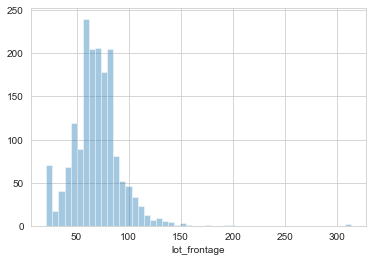

In [127]:
sns.distplot(train['lot_frontage'].dropna(),kde=False);

In [128]:
# Missing Values in Train
missing_train = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=["Missing in Training"])
missing_train[missing_train["Missing in Training"] >= 1]

,Missing in Training
lot_frontage,330


In [129]:
# However, not much information is given in Data Dictionary for "Lot Frontage" which has 16% missing values
# Lot Frontage (Continuous): Linear feet of street connected to property
train['lot_frontage'].head()

0     NaN
1    43.0
2    68.0
3    73.0
4    82.0
Name: lot_frontage, dtype: float64

In [130]:
train['lot_frontage'] = train.groupby('neighborhood')['lot_frontage'].apply(lambda hood: hood.fillna(hood.mean()))

In [131]:
train.groupby('neighborhood')['lot_frontage'].mean()

neighborhood
Blmngtn    47.250000
Blueste    27.666667
BrDale     21.315789
BrkSide    56.357143
ClearCr    92.500000
CollgCr    70.753247
Crawfor    69.272727
Edwards    66.930233
Gilbert    72.025641
Greens     40.000000
GrnHill          NaN
IDOTRR     62.079365
Landmrk          NaN
MeadowV    26.809524
Mitchel    75.476923
NAmes      75.192453
NPkVill    27.625000
NWAmes     80.965517
NoRidge    88.305556
NridgHt    86.294118
OldTown    62.802548
SWISU      58.387097
Sawyer     72.774648
SawyerW    70.493333
Somerst    63.982906
StoneBr    60.058824
Timber     78.594595
Veenker    67.846154
Name: lot_frontage, dtype: float64

- GrnHill and Landmrk is still NA let us explore why

In [132]:
train[(train['neighborhood'] == 'GrnHill') | (train['neighborhood'] == 'Landmrk')]

,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
463,2257,120,RM,NaN,9763,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1998,1998,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,239.0,Gd,TA,PConc,Gd,TA,No,GLQ,1102.0,ALQ,72.0,328.0,1502.0,GasA,Ex,Y,SBrkr,1502,0,0,1502,1.0,0.0,1,1,1,1,Gd,5,Typ,1,TA,Attchd,1998.0,Fin,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,No Fence,0,9,2007,WD,330000
1121,2789,160,RH,NaN,3612,Pave,IR1,Lvl,AllPub,Inside,Gtl,Landmrk,Norm,Norm,Twnhs,2Story,6,5,1993,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,338.0,Unf,0.0,292.0,630.0,GasA,Ex,Y,SBrkr,630,690,0,1320,0.0,0.0,2,1,3,1,TA,5,Typ,0,NA,Detchd,1993.0,Unf,2.0,484.0,TA,TA,Y,0,48,0,0,0,0,MnPrv,0,6,2006,WD,137000
1211,2893,120,RM,NaN,8239,Pave,IR1,Lvl,AllPub,Inside,Gtl,GrnHill,Norm,Norm,TwnhsE,1Story,7,5,1986,1986,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,Gd,TA,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1295,0,0,1295,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,1986.0,RFn,1.0,312.0,TA,TA,Y,0,0,0,0,0,0,No Fence,0,11,2006,WD,230000


- We can see that we cannot get the mean for these because the only values in these neighbourhoods are all null so it could not fill the null values with the mean
- So we will just fill in the mean for all Lot Frontage in these Null Values

In [133]:
train['lot_frontage'] = train['lot_frontage'].fillna(train['lot_frontage'].mean())

In [134]:
# Checking for Missing Values in Train
missing_train = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=["Missing in Training"])
missing_train[missing_train["Missing in Training"] >= 1]

,Missing in Training


## Lot Frontage in Testing Dataset

In [135]:
# Checking for Missing Values in Test
missing_test = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=["Missing in Testing"])
missing_test[missing_test["Missing in Testing"] >= 1]

,Missing in Testing


In [136]:
# However, not much information is given in Data Dictionary for "Lot Frontage" which has 16% missing values
# Lot Frontage (Continuous): Linear feet of street connected to property
test['lot_frontage'].head()

0    69.0
1     NaN
2    58.0
3    60.0
4     NaN
Name: lot_frontage, dtype: float64

In [137]:
test['lot_frontage'].fillna(value=0, inplace=True)

In [138]:
# Checking for Missing Values in Test
missing_test = pd.DataFrame(test.isna().sum().sort_values(ascending=False), columns=["Missing in Testing"])
missing_test[missing_test["Missing in Testing"] >= 1]

,Missing in Testing
electrical,1


# Electrical Null Values in Testing Dataset

In [139]:
# Electrical Null Value in Testing
test[test["electrical"].isnull()==True].index

Int64Index([634], dtype='int64')

In [140]:
#test.drop(index=634, axis=0, inplace=True)

In [141]:
# Checking for Missing Values in Test
missing_test = pd.DataFrame(test.isna().sum().sort_values(ascending=False), columns=["Missing in Testing"])
missing_test[missing_test["Missing in Testing"] >= 1]

,Missing in Testing
electrical,1


All null values taken care of in both Training and Testing Datasets

# Dealing with Ordinal Values

- We separate our data into Numeric, Ordinal and Nominal values
- For ordinal values, we will reassign the values to a numeric ranking system, by doing this instead of get dummies we minimize the number of unneccesary feature columns used for modelling later on

In [142]:
train.select_dtypes(object).columns

Index(['ms_subclass', 'ms_zoning', 'street', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_yr_blt', 'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive', 'fence', 'sale_type'],
      dtype='object')

In [143]:
# Looking at which features have ordinal values and which have numeric values
train.select_dtypes([np.number]).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2050 non-null   int64  
 1   lot_frontage     2050 non-null   float64
 2   lot_area         2050 non-null   int64  
 3   overall_qual     2050 non-null   int64  
 4   overall_cond     2050 non-null   int64  
 5   year_built       2050 non-null   int64  
 6   year_remod/add   2050 non-null   int64  
 7   mas_vnr_area     2050 non-null   float64
 8   bsmtfin_sf_1     2050 non-null   float64
 9   bsmtfin_sf_2     2050 non-null   float64
 10  bsmt_unf_sf      2050 non-null   float64
 11  total_bsmt_sf    2050 non-null   float64
 12  1st_flr_sf       2050 non-null   int64  
 13  2nd_flr_sf       2050 non-null   int64  
 14  low_qual_fin_sf  2050 non-null   int64  
 15  gr_liv_area      2050 non-null   int64  
 16  bsmt_full_bath   2050 non-null   float64
 17  bsmt_half_bath

In [144]:
test.select_dtypes([np.number]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   lot_frontage     878 non-null    float64
 2   lot_area         878 non-null    int64  
 3   overall_qual     878 non-null    int64  
 4   overall_cond     878 non-null    int64  
 5   year_built       878 non-null    int64  
 6   year_remod/add   878 non-null    int64  
 7   mas_vnr_area     878 non-null    float64
 8   bsmtfin_sf_1     878 non-null    int64  
 9   bsmtfin_sf_2     878 non-null    int64  
 10  bsmt_unf_sf      878 non-null    int64  
 11  total_bsmt_sf    878 non-null    int64  
 12  1st_flr_sf       878 non-null    int64  
 13  2nd_flr_sf       878 non-null    int64  
 14  low_qual_fin_sf  878 non-null    int64  
 15  gr_liv_area      878 non-null    int64  
 16  bsmt_full_bath   878 non-null    int64  
 17  bsmt_half_bath  

In [145]:
# Looking at which features have ordinal values and which have numeric values
train.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2050
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ms_subclass     2050 non-null   object
 1   ms_zoning       2050 non-null   object
 2   street          2050 non-null   object
 3   lot_shape       2050 non-null   object
 4   land_contour    2050 non-null   object
 5   utilities       2050 non-null   object
 6   lot_config      2050 non-null   object
 7   land_slope      2050 non-null   object
 8   neighborhood    2050 non-null   object
 9   condition_1     2050 non-null   object
 10  condition_2     2050 non-null   object
 11  bldg_type       2050 non-null   object
 12  house_style     2050 non-null   object
 13  roof_style      2050 non-null   object
 14  roof_matl       2050 non-null   object
 15  exterior_1st    2050 non-null   object
 16  exterior_2nd    2050 non-null   object
 17  mas_vnr_type    2050 non-null   object
 18  exter_qu

In [146]:
test.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ms_subclass     878 non-null    object
 1   ms_zoning       878 non-null    object
 2   street          878 non-null    object
 3   lot_shape       878 non-null    object
 4   land_contour    878 non-null    object
 5   utilities       878 non-null    object
 6   lot_config      878 non-null    object
 7   land_slope      878 non-null    object
 8   neighborhood    878 non-null    object
 9   condition_1     878 non-null    object
 10  condition_2     878 non-null    object
 11  bldg_type       878 non-null    object
 12  house_style     878 non-null    object
 13  roof_style      878 non-null    object
 14  roof_matl       878 non-null    object
 15  exterior_1st    878 non-null    object
 16  exterior_2nd    878 non-null    object
 17  mas_vnr_type    878 non-null    object
 18  exter_qual

We will create a function to convert the following feature types from Ordinal to Numeric based on numeric classifications for these specific features

In [147]:
ordinal_selected = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
           'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',
           'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive']

In [148]:
ordinal_values = [{'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1},
             {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1},
             {'Gtl':3, 'Mod':2, 'Sev':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Gd':4, 'Av':3, 'Mn':2, 'No':1, 'NA':0},
             {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
             {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
             {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Fin':3, 'RFn':2, 'Unf':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0},
             {'Y':3, 'P':2, 'N':1}]

In [149]:
def convert_ordinal(columns,values,df):
    for i in range(0,19):
        df[columns[i]].replace(values[i], inplace=True)

# Using the function created to convert ordinals in both train and test datasets
convert_ordinal(ordinal_selected,ordinal_values,train)
convert_ordinal(ordinal_selected,ordinal_values,test)

In [150]:
# Ordinals in Train dataset
train[['lot_shape', 'utilities',
       'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc',
       'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu',
       'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive']].dtypes

lot_shape          int64
utilities          int64
land_slope         int64
exter_qual         int64
exter_cond         int64
bsmt_qual          int64
bsmt_cond          int64
bsmt_exposure      int64
bsmtfin_type_1     int64
bsmtfin_type_2    object
heating_qc         int64
electrical         int64
kitchen_qual       int64
functional         int64
fireplace_qu       int64
garage_finish      int64
garage_qual        int64
garage_cond        int64
paved_drive        int64
dtype: object

In [151]:
# Ordinals in Test dataset
test[['lot_shape', 'utilities',
       'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc',
       'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu',
       'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive']].dtypes

lot_shape           int64
utilities           int64
land_slope          int64
exter_qual          int64
exter_cond          int64
bsmt_qual           int64
bsmt_cond           int64
bsmt_exposure       int64
bsmtfin_type_1      int64
bsmtfin_type_2      int64
heating_qc          int64
electrical        float64
kitchen_qual        int64
functional          int64
fireplace_qu        int64
garage_finish       int64
garage_qual         int64
garage_cond         int64
paved_drive         int64
dtype: object

In [152]:
#For some reason bsmtfin_type_2 is still object data type in Train
train['bsmtfin_type_2'].head()

0    1
1    1
2    1
3    1
4    1
Name: bsmtfin_type_2, dtype: object

In [153]:
# We can convert the data type in train
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].astype(int)

In [154]:
train[['lot_shape', 'utilities',
       'land_slope', 'exter_qual',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc',
       'electrical', 'kitchen_qual',
       'functional', 'fireplace_qu',
       'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive']].dtypes

lot_shape         int64
utilities         int64
land_slope        int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int32
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
dtype: object

# Exporting Cleaned Datasets

In [155]:
## Exporting Cleaned Train Datasets

In [156]:
train.to_csv('../project_2/datasets/train_cleaned.csv')

In [157]:
## Exporting Cleaned Test Datasets

In [158]:
test.to_csv('../project_2/datasets/test_cleaned.csv')

# EDA

The main objectives of this section are:
1. To determine which features we can select that will have an association with the target "SalePrice" figure
2. Dimensional reduction for X features

## Import Cleaned Data for EDA

In [159]:
train_eda = pd.read_csv('../project_2/datasets/train_cleaned.csv')

In [160]:
test_eda = pd.read_csv('../project_2/datasets/test_cleaned.csv')

In [161]:
## Display Data

In [162]:
train_eda.head()

,Unnamed: 0,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,109,60,RL,72.774648,13517,Pave,3,Lvl,4,CulDSac,3,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,4,3,CBlock,3,3,1,6,533.0,1,0.0,192.0,725.0,GasA,5,Y,5,725,754,0,1479,0.0,0.0,2,1,3,1,4,6,7,0,0,Attchd,1976.0,2,2.0,475.0,3,3,3,0,44,0,0,0,0,No Fence,0,3,2010,WD,130500
1,1,544,60,RL,43.000000,11492,Pave,3,Lvl,4,CulDSac,3,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,4,3,PConc,4,3,1,6,637.0,1,0.0,276.0,913.0,GasA,5,Y,5,913,1209,0,2122,1.0,0.0,2,1,4,1,4,8,7,1,3,Attchd,1997.0,2,2.0,559.0,3,3,3,0,74,0,0,0,0,No Fence,0,4,2009,WD,220000
2,2,153,20,RL,68.000000,7922,Pave,4,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,4,CBlock,3,3,1,6,731.0,1,0.0,326.0,1057.0,GasA,3,Y,5,1057,0,0,1057,1.0,0.0,1,0,3,1,4,5,7,0,0,Detchd,1953.0,1,1.0,246.0,3,3,3,0,52,0,0,0,0,No Fence,0,1,2010,WD,109000
3,3,318,60,RL,73.000000,9802,Pave,4,Lvl,4,Inside,3,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,PConc,4,3,1,1,0.0,1,0.0,384.0,384.0,GasA,4,Y,5,744,700,0,1444,0.0,0.0,2,1,3,1,3,7,7,0,0,BuiltIn,2007.0,3,2.0,400.0,3,3,3,100,0,0,0,0,0,No Fence,0,4,2010,WD,174000
4,4,255,50,RL,82.000000,14235,Pave,3,Lvl,4,Inside,3,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,3,3,PConc,2,4,1,1,0.0,1,0.0,676.0,676.0,GasA,3,Y,5,831,614,0,1445,0.0,0.0,2,0,3,1,3,6,7,0,0,Detchd,1957.0,1,2.0,484.0,3,3,1,0,59,0,0,0,0,No Fence,0,3,2010,WD,138500


In [163]:
test_eda.head()

,Unnamed: 0,id,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,fence,misc_val,mo_sold,yr_sold,sale_type
0,0,2658,190,RM,69.0,9142,Pave,4,Lvl,4,Inside,3,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,3,2,Stone,2,3,1,1,0,1,0,1020,1020,GasA,4,N,2.0,908,1020,0,1928,0,0,2,0,4,2,2,9,7,0,0,Detchd,1910.0,1,1,440,1,1,3,0,60,112,0,0,0,No Fence,0,4,2006,WD
1,1,2718,90,RL,0.0,9662,Pave,3,Lvl,4,Inside,3,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,3,3,CBlock,4,3,1,1,0,1,0,1967,1967,GasA,3,Y,5.0,1967,0,0,1967,0,0,2,0,6,2,3,10,7,0,0,Attchd,1977.0,3,2,580,3,3,3,170,0,0,0,0,0,No Fence,0,8,2006,WD
2,2,2414,60,RL,58.0,17104,Pave,3,Lvl,4,Inside,3,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,4,3,6,554,1,0,100,654,GasA,5,Y,5.0,664,832,0,1496,1,0,2,1,3,1,4,7,7,1,4,Attchd,2006.0,2,2,426,3,3,3,100,24,0,0,0,0,No Fence,0,9,2006,New
3,3,1989,30,RM,60.0,8520,Pave,4,Lvl,4,Inside,3,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,4,3,CBlock,3,3,1,1,0,1,0,968,968,GasA,3,Y,5.0,968,0,0,968,0,0,1,0,2,1,3,5,7,0,0,Detchd,1935.0,1,2,480,2,3,1,0,0,184,0,0,0,No Fence,0,7,2007,WD
4,4,625,20,RL,0.0,9500,Pave,3,Lvl,4,Inside,3,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,3,3,CBlock,4,3,1,4,609,1,0,785,1394,GasA,4,Y,5.0,1394,0,0,1394,1,0,1,1,3,1,3,6,7,2,4,Attchd,1963.0,2,2,514,3,3,3,0,76,0,0,185,0,No Fence,0,7,2009,WD


## Removed Unnamed:0

In [164]:
train_eda.drop('Unnamed: 0', axis=1, inplace=True)

In [165]:
test_eda.drop('Unnamed: 0', axis=1, inplace=True)

## Check for Null Values

In [166]:
train_eda.isnull().sum()

id                   0
ms_subclass          0
ms_zoning            0
lot_frontage         0
lot_area             0
street               0
lot_shape            0
land_contour         0
utilities            0
lot_config           0
land_slope           0
neighborhood         0
condition_1          0
condition_2          0
bldg_type            0
house_style          0
overall_qual         0
overall_cond         0
year_built           0
year_remod/add       0
roof_style           0
roof_matl            0
exterior_1st         0
exterior_2nd         0
mas_vnr_type         0
mas_vnr_area         0
exter_qual           0
exter_cond           0
foundation           0
bsmt_qual            0
bsmt_cond            0
bsmt_exposure        0
bsmtfin_type_1       0
bsmtfin_sf_1         0
bsmtfin_type_2       0
bsmtfin_sf_2         0
bsmt_unf_sf          0
total_bsmt_sf        0
heating              0
heating_qc           0
central_air          0
electrical           0
1st_flr_sf           0
2nd_flr_sf 

In [167]:
train_eda.shape

(2050, 77)

In [168]:
train_eda.describe()

,id,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating_qc,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,1473.661463,57.002439,69.651638,10065.698537,3.595610,3.998537,2.947317,6.112683,5.561951,1971.732683,1984.182927,98.674634,3.406341,3.085854,3.489756,2.929268,1.629268,3.563902,442.033171,1.274634,47.959024,567.576585,1057.568780,4.158049,4.885366,1164.596585,329.057561,5.515610,1499.169756,0.427317,0.063415,1.577073,0.371220,2.843415,1.042927,3.517073,6.436098,6.842927,0.591220,1.764390,1869.637561,1.723902,1.776585,473.671707,2.804390,2.811707,2.833659,93.794634,47.580000,22.479512,2.592683,16.519512,2.399024,51.599512,6.221463,2007.776098,181484.609268
std,844.018399,42.833710,21.688392,6744.097442,0.566582,0.049377,0.244321,1.426407,1.104724,30.166057,21.038838,174.353604,0.588037,0.372879,0.901786,0.572147,1.079614,2.125874,461.301632,0.949784,165.000901,445.095355,449.996406,0.964168,0.402567,396.513176,425.597182,51.081185,500.517246,0.522631,0.251648,0.549334,0.501098,0.826813,0.209839,0.665654,1.560576,0.683567,0.638539,1.807095,452.363664,0.898382,0.764537,215.934561,0.718765,0.713572,0.534910,128.568578,66.755256,59.713182,25.235706,57.387043,37.791752,573.532756,2.744483,1.312222,79275.121591
min,1.000000,20.000000,21.000000,1300.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.250000,20.000000,60.000000,7500.000000,3.000000,4.000000,3.000000,5.000000,5.000000,1954.000000,1964.250000,0.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,220.000000,793.000000,3.000000,5.000000,879.250000,0.000000,0.000000,1128.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,5.000000,7.000000,0.000000,0.000000,1957.250000,1.000000,1.000000,319.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129812.500000
50%,1483.500000,50.000000,70.000000,9432.000000,4.000000,4.000000,3.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,368.000000,1.000000,0.000000,474.500000,994.500000,5.000000,5.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000,7.000000,1.000000,1.000000,1978.000000,2.0000

# Compare Numeric Features with Sale Price using Correlation Heatmap

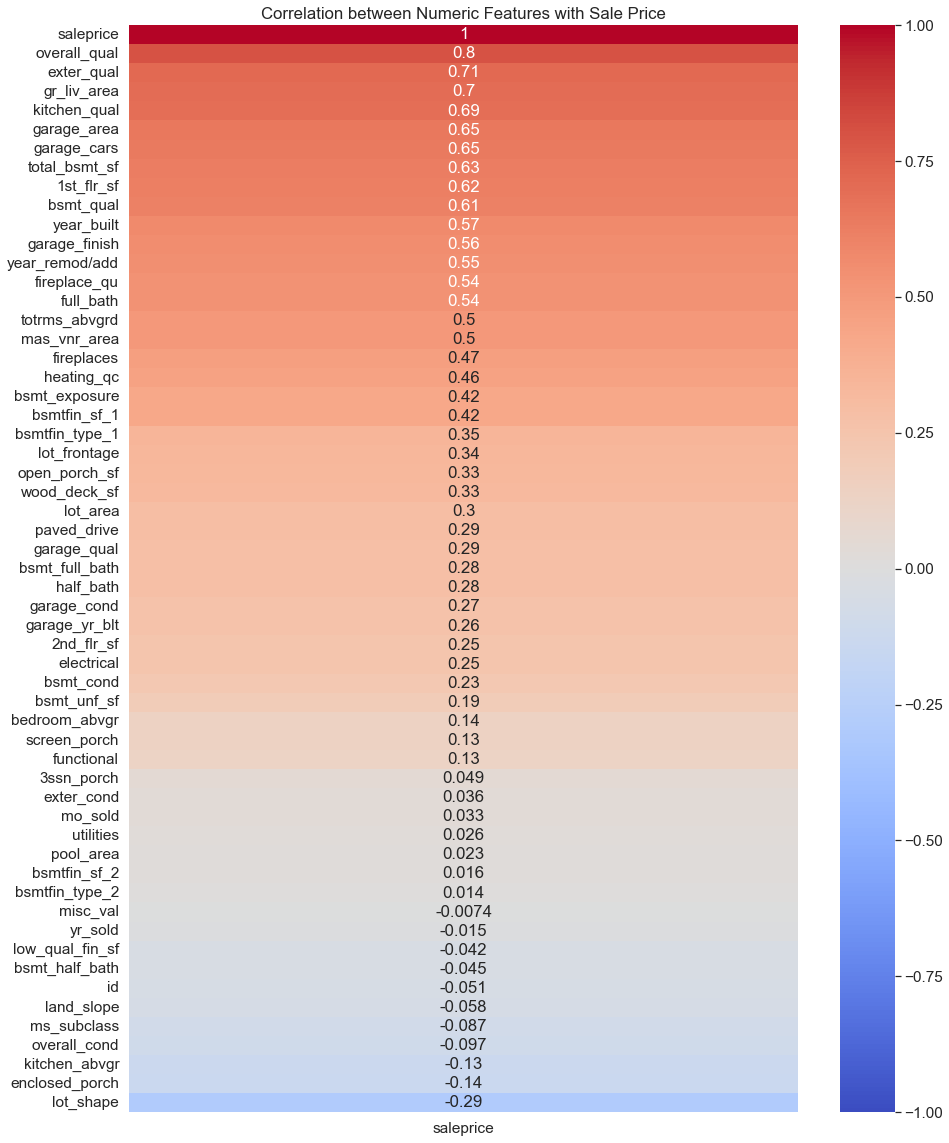

In [169]:
train_eda_corr = train_eda.corr()

plt.figure(figsize=(15,20))
sns.set(font_scale=1.4)
sns.heatmap(train_eda_corr[['saleprice']].sort_values(by=['saleprice'], ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True)
plt.title('Correlation between Numeric Features with Sale Price');

Text(0.5, 1.0, 'Correlation of Numerical Features in Ames Housing data')

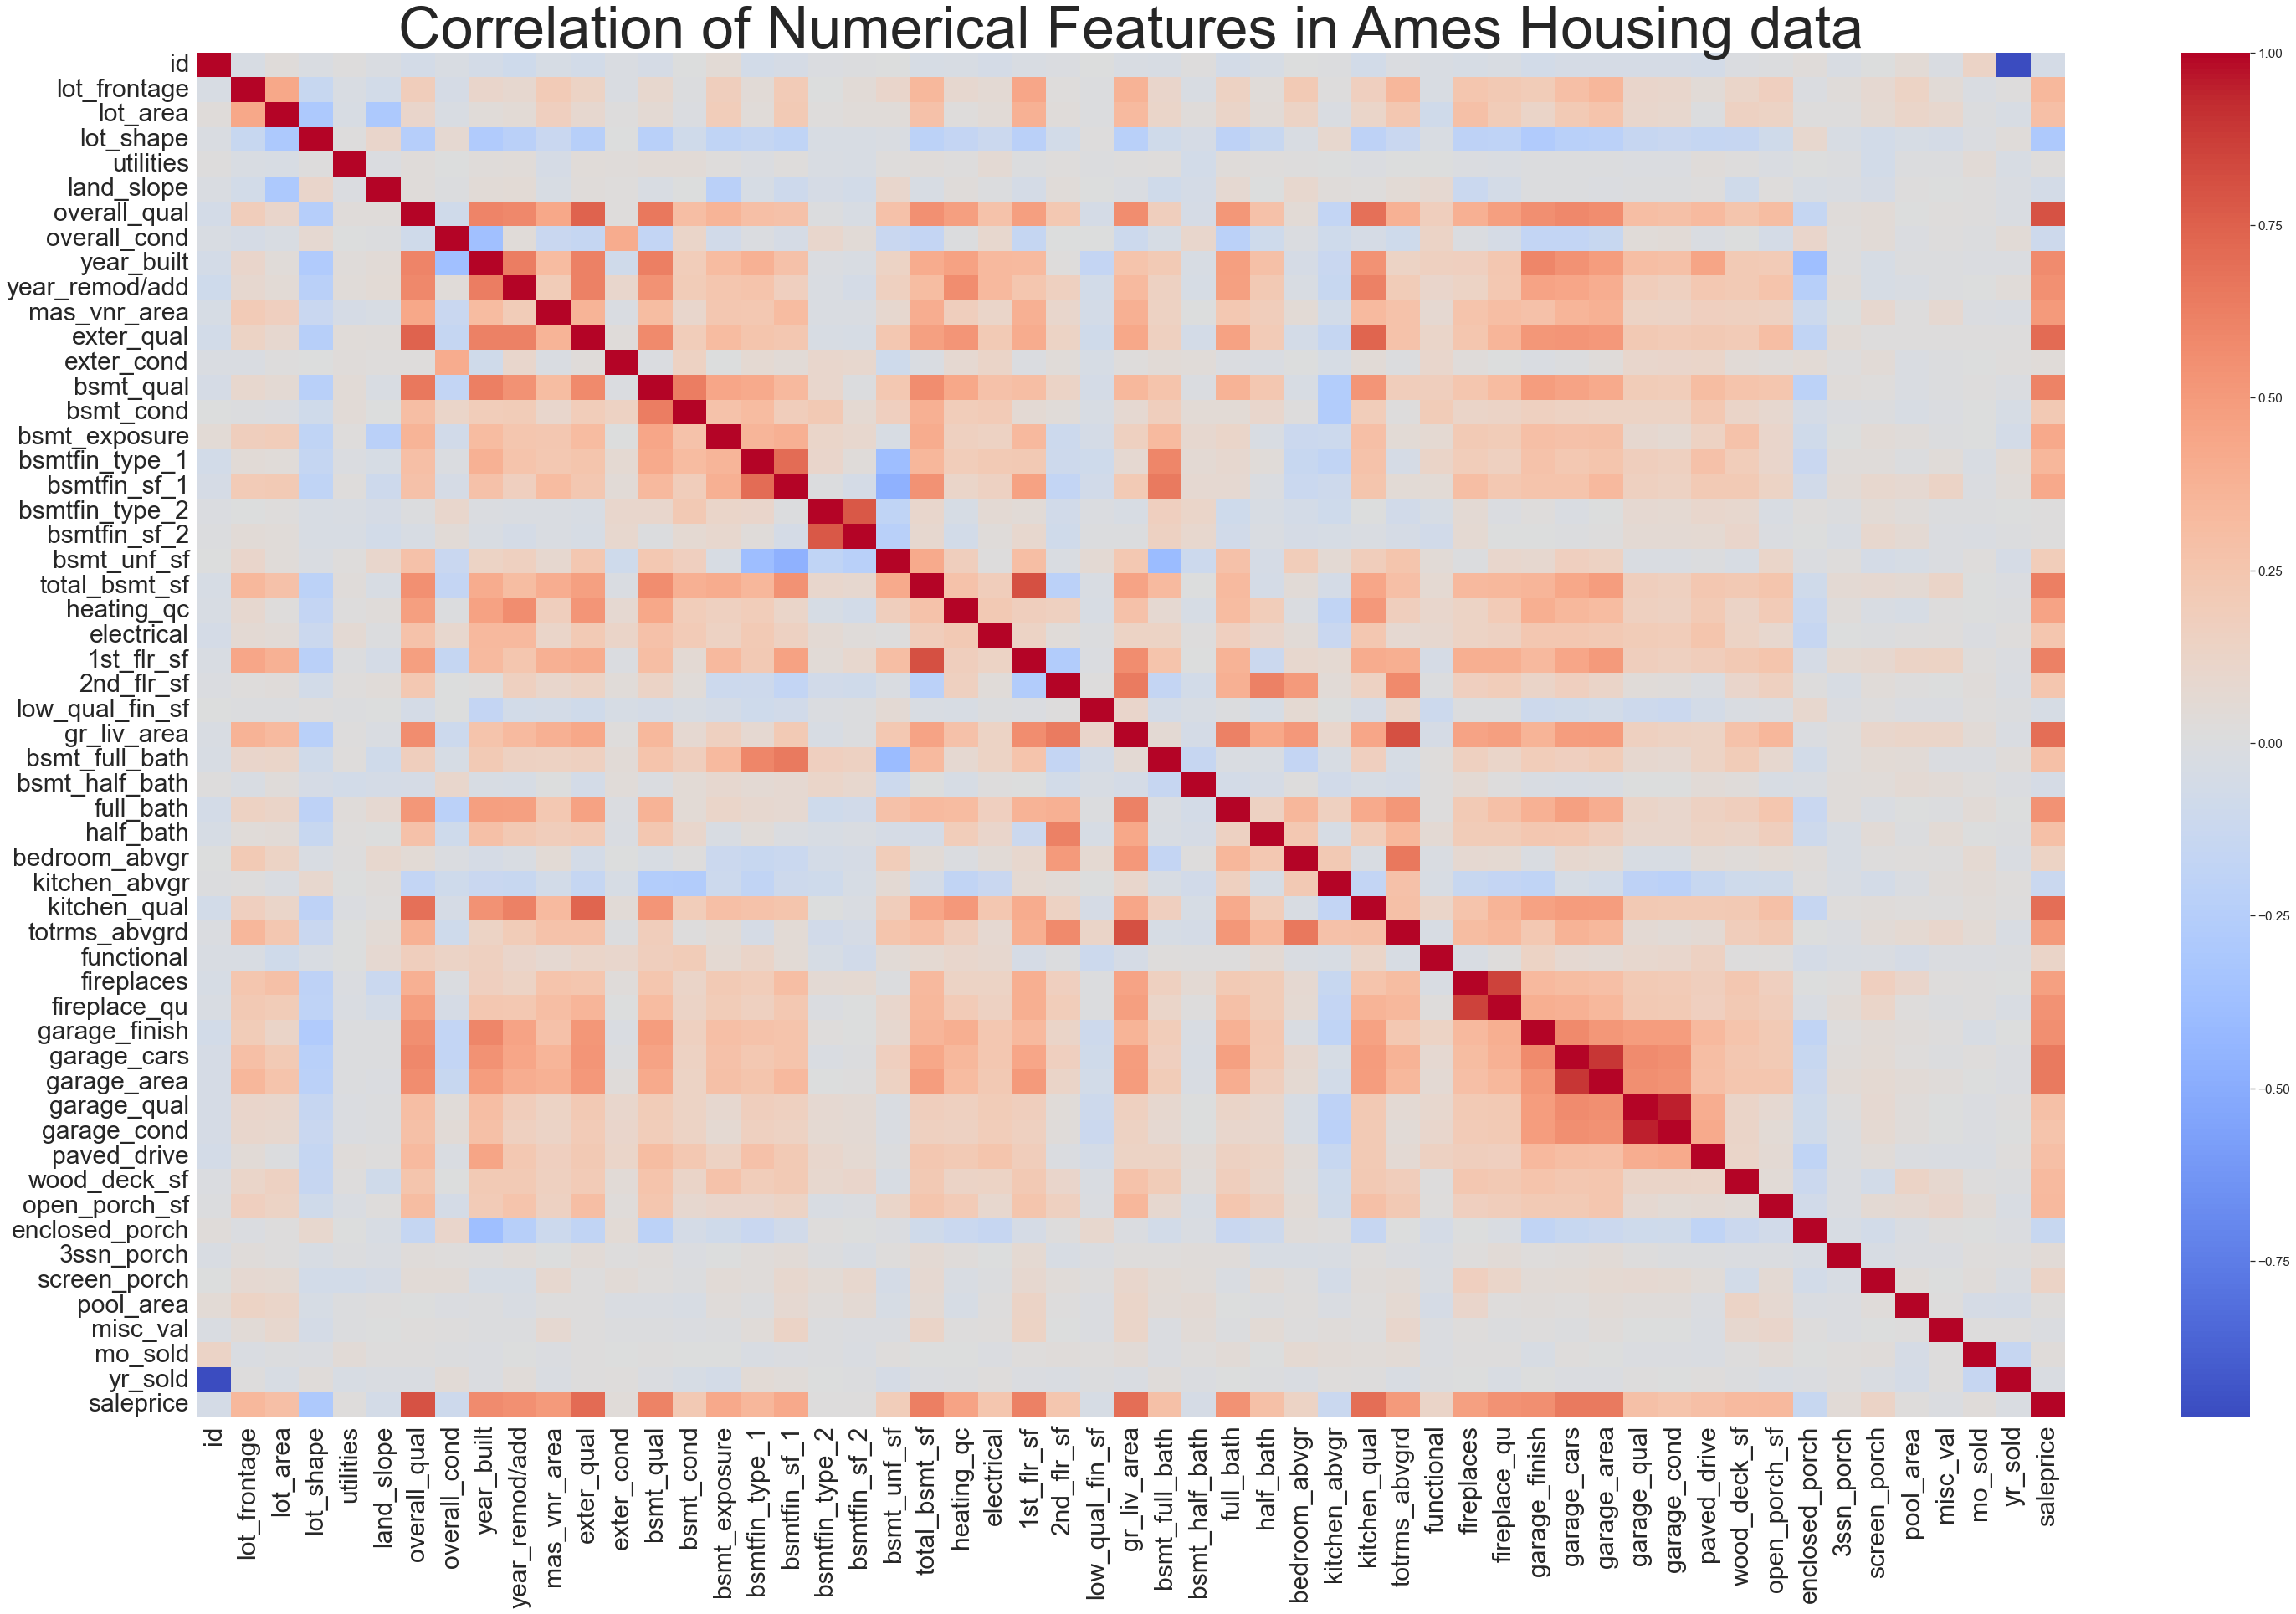

In [170]:
fig, ax = plt.subplots(figsize = (50,30))


sns.heatmap(train.corr(), cmap='coolwarm')
ax.tick_params(labelsize=30)
plt.title('Correlation of Numerical Features in Ames Housing data', fontsize=70)

From the heatmap above, we can see that - Over Quality, Exterior Quality, Grade Living Area, Kitchen Quality are all highly corelated strongly with Sale Price

# Deciding which Features to Use

Here we will go through the features step by step and decide which has features to use and which to drop. We will consider correlation of the feature with saleprice  

Please note we are looking at each feature in accordance with the data dictionary:  
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

## 1. MS Subclass

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.

<AxesSubplot:xlabel='ms_subclass', ylabel='saleprice'>

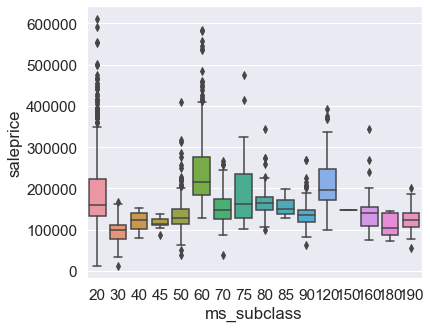

In [171]:
# Drawing a Boxplot to see MS Subclass and SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="ms_subclass", y="saleprice", data=train_eda)

Decision:
- Some subclasses median values have a correlation with the Sales Price so we will keep this

## 2. MS Zoning

MS Zoning (Nominal): Identifies the general zoning classification of the sale.

<AxesSubplot:xlabel='ms_zoning', ylabel='saleprice'>

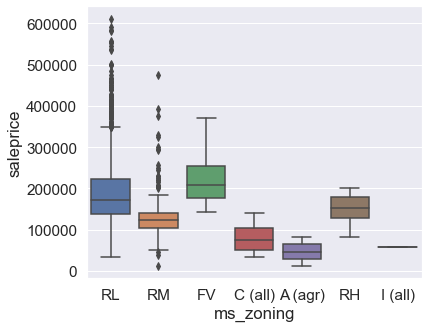

In [172]:
# Drawing a Boxplot to see MS Zoning and SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="ms_zoning", y="saleprice", data=train_eda)

Decision:
- Some MS Zoning areas have an effect on Sales Price so we will keep this

## 3. Lot Area

Lot Area (Continuous): Lot size in square feet

<AxesSubplot:xlabel='lot_area', ylabel='saleprice'>

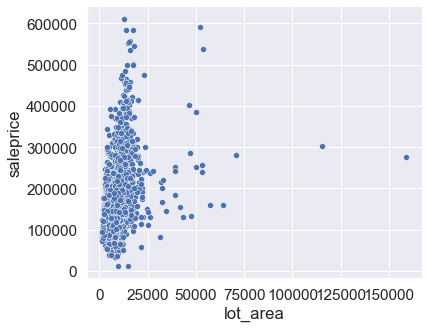

In [173]:
# Drawing a Scatterplot to see Lot Area and SalePrice
plt.figure(figsize=(6,5))
sns.scatterplot(x="lot_area", y="saleprice", data=train_eda)

We can see there are outliers here that we can remove

In [174]:
train_eda['lot_area'].sort_values(ascending=False).reset_index().head()

,index,lot_area
0,471,159000
1,694,115149
2,1853,70761
3,960,63887
4,745,57200


In [175]:
# Drop rows with the outliers for Lot Area
train_eda.drop(index=471, axis=0, inplace=True)
train_eda.drop(index=694, axis=0, inplace=True)

In [176]:
test_eda['lot_area'].sort_values(ascending=False).reset_index().head()

,index,lot_area
0,213,215245
1,306,164660
2,522,56600
3,715,45600
4,869,36500


In [177]:
# Doing the same for test data
#test_eda.drop(index=213, axis=0, inplace=True)
#test_eda.drop(index=306, axis=0, inplace=True)

In [178]:
# Function to Check for Correlation between 2 columns
def corr_check(a, b):
    return train_eda[a].corr(train_eda[b], method='pearson')

In [179]:
corr_check('lot_area', 'saleprice')

0.3394502456802404

After removing the outliers, the correlation is slightly stronger with saleprice, so we will keep lot area

## 4. Street

Street (Nominal): Type of road access to property

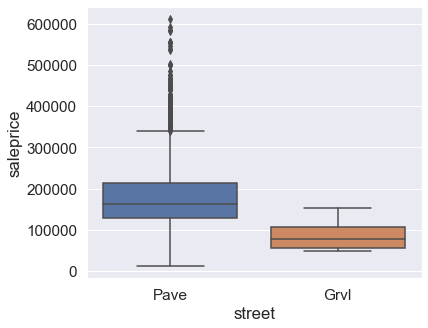

In [180]:
# Drawing a Boxplot to see Street and SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="street", y="saleprice", data=train_eda);

Decision:
- We can see that streets with a pavement has a higher mean Sales Price than if the streets were made of Gravel
- Therefore, street would be a factor we should keep for further analysis

## 5. Lot Shape

Lot Shape (Ordinal): General shape of property

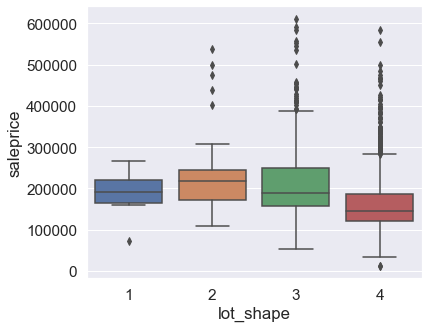

In [181]:
# Drawing a Boxplot to see Lot Shape and SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="lot_shape", y="saleprice", data=train_eda);

There does not seem to be much of an association between Lot Shape and Sales Price, additionally we already have lot area as a feature as mentioned earlier. Therefore I will drop this feature

In [182]:
# Dropping Lot Shape
train_eda.drop("lot_shape", axis=1, inplace=True)
test_eda.drop("lot_shape", axis=1, inplace=True)

# 6. Land Contour

Land Contour (Nominal): Flatness of the property

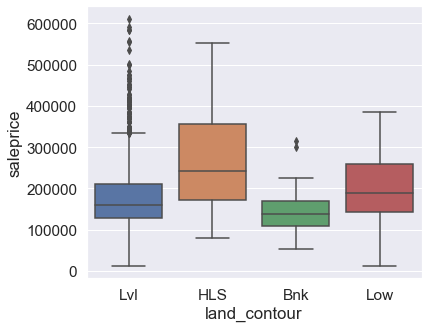

In [183]:
# Drawing a Boxplot to see Land Contour and SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="land_contour", y="saleprice", data=train_eda);

**Decision:**
- We can see that Hillside houses have a higher median price, whereas Banked (Quick and significant rise from street grade to building) seems to have a lower price
- Therefore, land contour could be useful in determining Sale Price

# 7. Utilities

Utilities (Ordinal): Type of utilities available

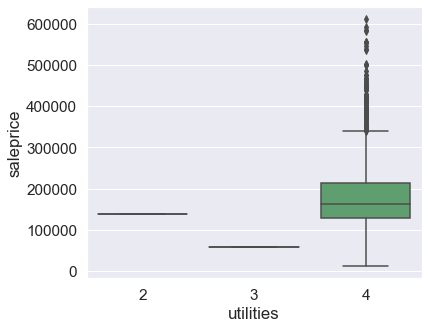

In [184]:
# Drawing a Boxplot to see Utilities and SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="utilities", y="saleprice", data=train_eda);

In [185]:
train_eda["utilities"].value_counts()

4    2046
2       1
3       1
Name: utilities, dtype: int64

In [186]:
# Almost all the houses have All public utilities available, so there is
train_eda.drop(["utilities"], axis=1, inplace=True)
test_eda.drop(["utilities"], axis=1, inplace=True)

**Decision:**
- Dropped Utilities because almost all the entries are for AllPub, so no useful information in relation to Sale Price can be obtained

# 8. Lot Config

Lot Config (Nominal): Lot configuration

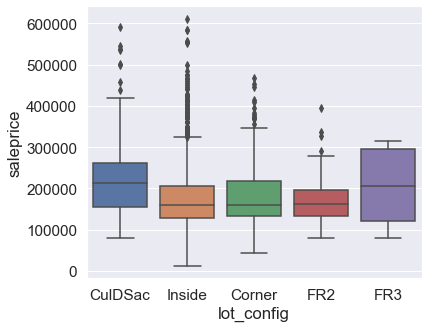

In [187]:
# Drawing a Boxplot to see Lot Config and SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="lot_config", y="saleprice", data=train_eda);

In [188]:
# Dropping lot config in Train and Test
train_eda.drop(["lot_config"], axis=1, inplace=True)
test_eda.drop(["lot_config"], axis=1, inplace=True)

**Decision:**
- Dropping as there doesnt seem to be much of an association with Sales Price, all the median values and spreads of the boxplots are comparable

# 9. Land Slope

Land Slope (Ordinal): Slope of property

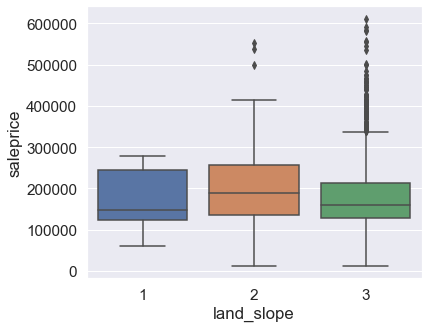

In [189]:
# Drawing a Boxplot to see Land Slope and SalePrice
plt.figure(figsize=(6,5))
sns.boxplot(x="land_slope", y="saleprice", data=train_eda);

In [190]:
# Dropping land slope in Train and Test
train_eda.drop(["land_slope"], axis=1, inplace=True)
test_eda.drop(["land_slope"], axis=1, inplace=True)

**Decision:**
- Dropping as there doesnt seem to be much of an association for land slope with Sales Price, all the median values and spreads of the boxplots are comparable

# 10. Neighborhood

Neighborhood (Nominal): Physical locations within Ames city limits (map available)

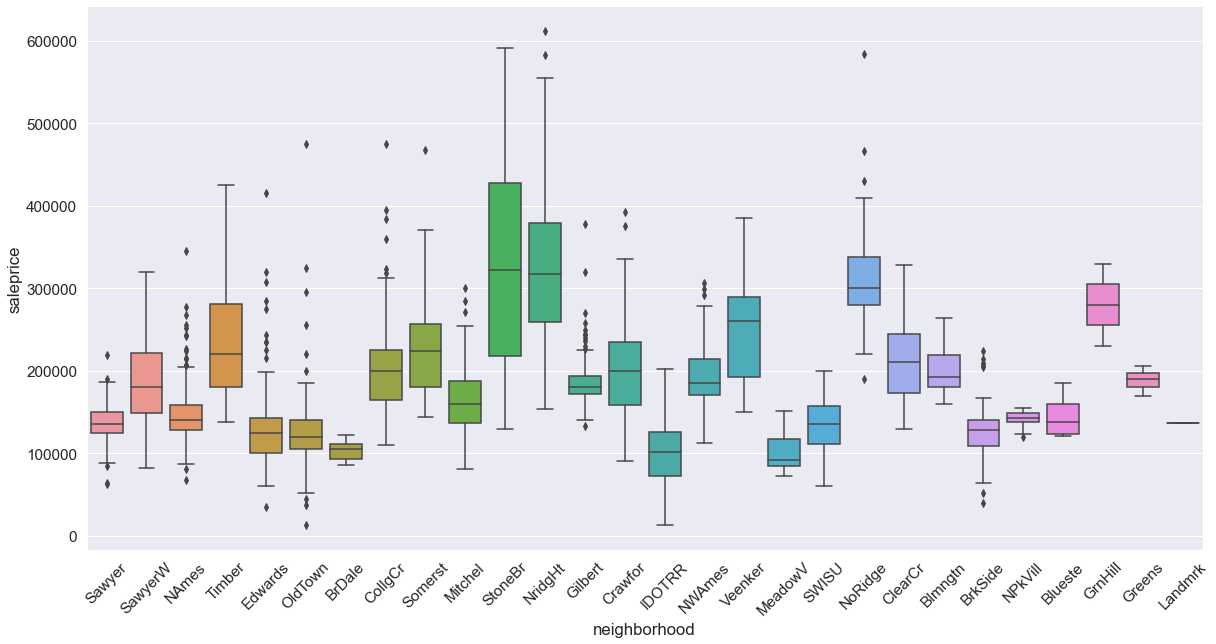

In [191]:
# Drawing a Boxplot to see Neighborhood and SalePrice
plt.figure(figsize=(20,10))
neigh = sns.boxplot(x="neighborhood", y="saleprice", data=train_eda)
neigh.set_xticklabels(neigh.get_xticklabels(), rotation=45);

**Decision:**
- We can see that the neighborhood does have an impact on sale price so we will keep it as a feature

# 11. Condition 1

Condition 1 (Nominal): Proximity to various conditions

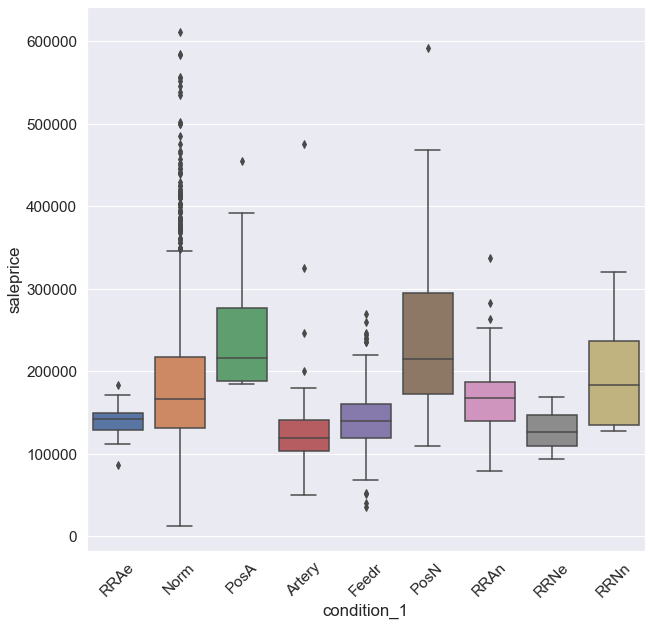

In [192]:
# Drawing a Boxplot to see Condition 1 and SalePrice
plt.figure(figsize=(10,10))
cond1 = sns.boxplot(x="condition_1", y="saleprice", data=train_eda)
cond1.set_xticklabels(cond1.get_xticklabels(), rotation=45);

**Decision:**
- Proximity to various conditions is important to consider as it has an impact on sales price, hence we are keeping it

# 12. Condition 2

Condition 2 (Nominal): Proximity to various conditions (if more than one is present)

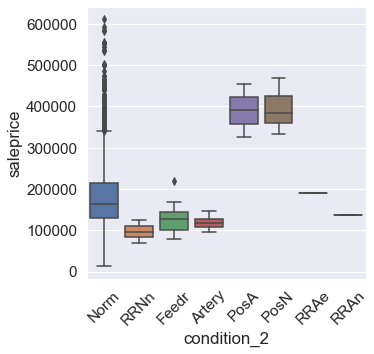

In [193]:
# Drawing a Boxplot to see Condition 2 and SalePrice
plt.figure(figsize=(5,5))
cond2 = sns.boxplot(x="condition_2", y="saleprice", data=train_eda)
cond2.set_xticklabels(cond2.get_xticklabels(), rotation=45);

In [194]:
train_eda["condition_2"].value_counts()

Norm      2022
Feedr       11
Artery       5
PosA         3
PosN         3
RRNn         2
RRAe         1
RRAn         1
Name: condition_2, dtype: int64

**Decision:**
- From the value count, we can see the vast majority of proximity to various conditions is normal. Hence, we will drop condition 2 as it does not really have an affect on Sale Price

In [195]:
# Dropping condition_2 in Train and Test
train_eda.drop(["condition_2"], axis=1, inplace=True)
test_eda.drop(["condition_2"], axis=1, inplace=True)

# 12. Bldg Type 

Bldg Type (Nominal): Type of dwelling

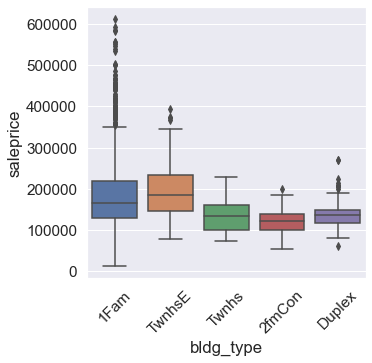

In [196]:
# Drawing a Boxplot to see Bldg Type and SalePrice
plt.figure(figsize=(5,5))
bld = sns.boxplot(x="bldg_type", y="saleprice", data=train_eda)
bld.set_xticklabels(bld.get_xticklabels(), rotation=45);

In [197]:
train_eda["bldg_type"].value_counts()

1Fam      1697
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

**Decision:**
- Type of dwelling would definitely have an impact on sale price even if the feature contains mostly "1Fam" houses, so keeping it

# 13. House Style

House Style (Nominal): Style of dwelling

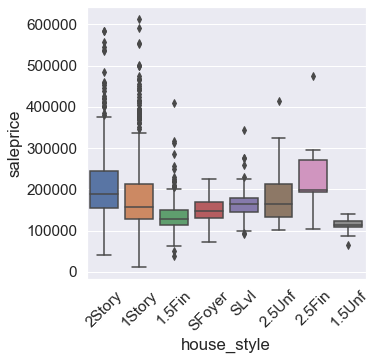

In [198]:
# Drawing a Boxplot to see House Style and SalePrice
plt.figure(figsize=(5,5))
hs = sns.boxplot(x="house_style", y="saleprice", data=train_eda)
hs.set_xticklabels(hs.get_xticklabels(), rotation=45);

In [199]:
train_eda["house_style"].value_counts()

1Story    1058
2Story     597
1.5Fin     217
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: house_style, dtype: int64

**Decision:**
- Type of dwelling would definitely have an impact on sale price even if the feature contains mostly "1Fam" houses, so keeping it

# 14. Overall Qual

Overall Qual (Ordinal): Rates the overall material and finish of the house

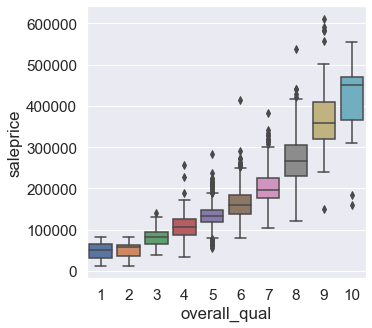

In [200]:
# Drawing a Boxplot to see Overall Qual and SalePrice
plt.figure(figsize=(5,5))
oq = sns.boxplot(x="overall_qual", y="saleprice", data=train_eda)
oq.set_xticklabels(oq.get_xticklabels(), rotation=0);

**Decision:**
- From the boxplot above, we can see a clear association between overall materials, house finish and sales price so we are keeping this feature

# 15. Overall Cond

Overall Cond (Ordinal): Rates the overall condition of the house

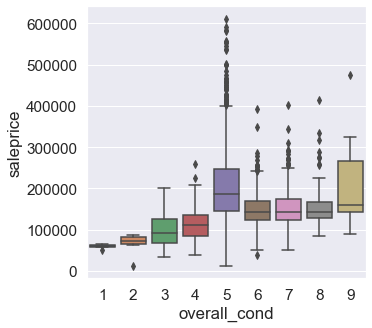

In [201]:
# Drawing a Boxplot to see Overall Cond and SalePrice
plt.figure(figsize=(5,5))
oc = sns.boxplot(x="overall_cond", y="saleprice", data=train_eda)
oc.set_xticklabels(oc.get_xticklabels(), rotation=0);

**Decision:**
- The overall condition of the house does have an association with sales price but after a rating of 5, its seems like there is a plateau on sales price
- We will keep this feature for further analysis

# 16. Year Built 

Year Built (Discrete): Original construction date

C:\Users\User\AppData\Local\Temp/ipykernel_29508/3745329168.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  yb.set_xticklabels(yb.get_xticklabels(), rotation=0);


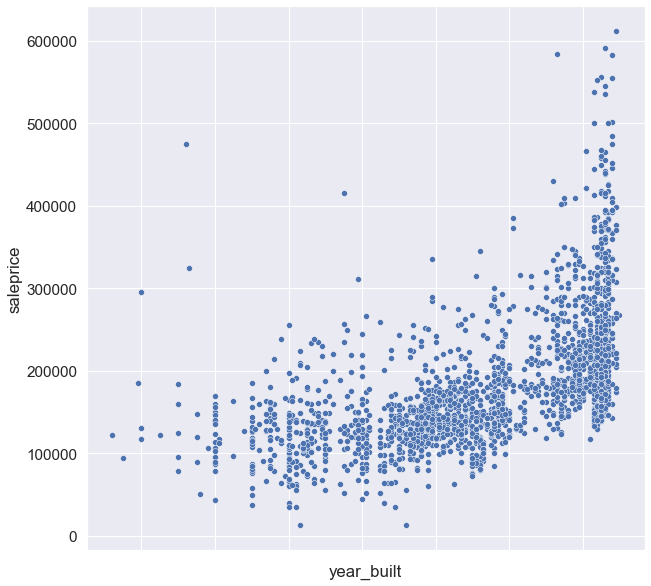

In [202]:
# Drawing a Boxplot to see Year Built and SalePrice
plt.figure(figsize=(10,10))
yb = sns.scatterplot(x="year_built", y="saleprice", data=train_eda)
yb.set_xticklabels(yb.get_xticklabels(), rotation=0);

**Decision:**
- From the scatterplot above, we can see a clear association between the more recent the house was built  the higher the sale price, so we are keeping this feature

# 17. Year Remod/Add

Year Remod/Add (Discrete): Remodel date (same as construction date if no remodeling or additions)

C:\Users\User\AppData\Local\Temp/ipykernel_29508/447475800.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  yr.set_xticklabels(yr.get_xticklabels(), rotation=0);


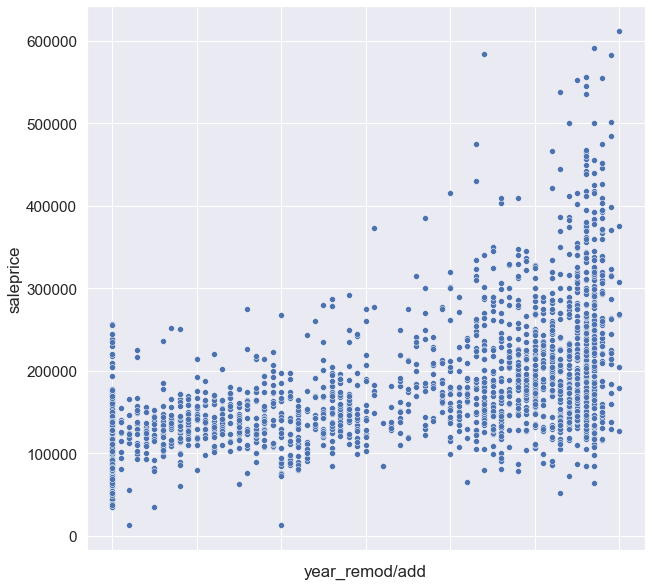

In [203]:
# Drawing a Boxplot to see Year Remod/Add and SalePrice
plt.figure(figsize=(10,10))
yr = sns.scatterplot(x="year_remod/add", y="saleprice", data=train_eda)
yr.set_xticklabels(yr.get_xticklabels(), rotation=0);

**Decision:**
- From the scatterplot above, we can see a clear association between the more recent the house was remodeled or had additions the higher the sale price, so we are keeping this feature

# 18. Roof Style

Roof Style (Nominal): Type of roof

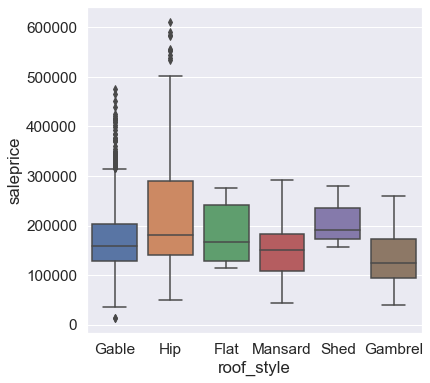

In [204]:
# Drawing a Boxplot to see Year Roof Style and SalePrice
plt.figure(figsize=(6,6))
rs = sns.boxplot(x="roof_style", y="saleprice", data=train_eda)
rs.set_xticklabels(rs.get_xticklabels(), rotation=0);

**Decision:**
- Hip style roofs have a higher sale price overall, so we shall keep roof style

# 19. Roof Matl

Roof Matl (Nominal): Roof material

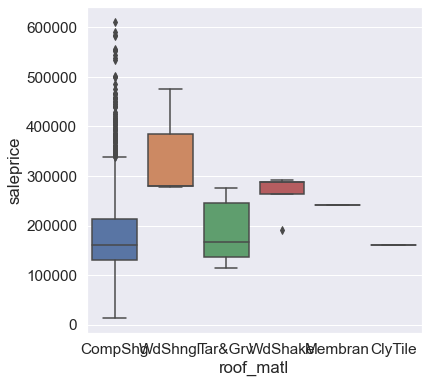

In [205]:
plt.figure(figsize=(6,6))
rm = sns.boxplot(x="roof_matl", y="saleprice", data=train_eda)
rm.set_xticklabels(rm.get_xticklabels(), rotation=0);

In [206]:
train_eda['roof_matl'].value_counts()

CompShg    2022
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: roof_matl, dtype: int64

**Decision:**
- A vast majority of the roof materials are Standard (Composite) Shingle, therefore this feature does not have a great bearing on sales price so we shall remove it as a feature

In [207]:
# Dropping Roof Matl in Train and Test
train_eda.drop(["roof_matl"], axis=1, inplace=True)
test_eda.drop(["roof_matl"], axis=1, inplace=True)

# 20. Exterior 1

Exterior 1 (Nominal): Exterior covering on house

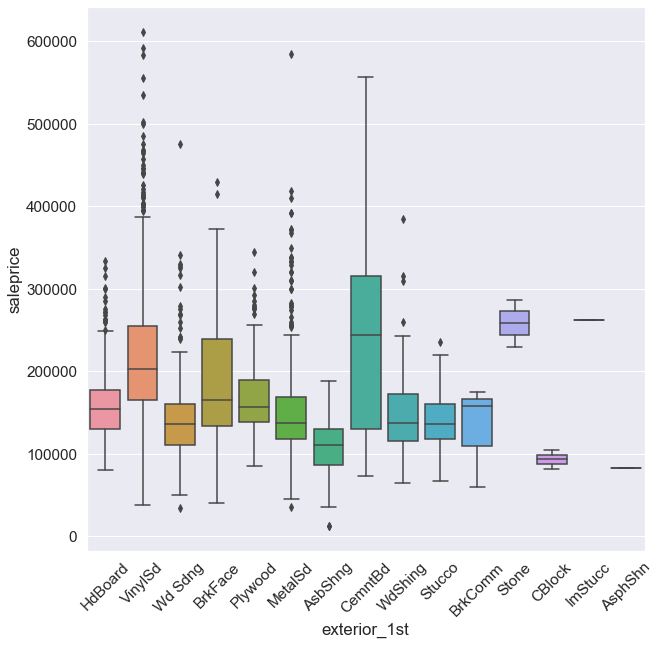

In [208]:
plt.figure(figsize=(10,10))
e1 = sns.boxplot(x="exterior_1st", y="saleprice", data=train_eda)
e1.set_xticklabels(e1.get_xticklabels(), rotation=45);

In [209]:
train_eda['exterior_1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    274
Plywood    151
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: exterior_1st, dtype: int64

**Decision:**
- Seems to be quite a lot in variation in price depending on what exterior covers the house and the sales price, so we will keep this feature

# 21. Exterior 2

Exterior 2 (Nominal): Exterior covering on house (if more than one material)

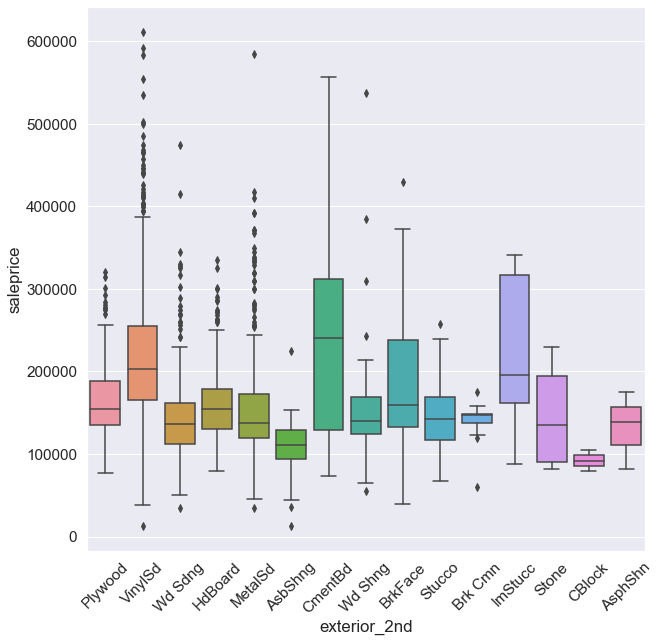

In [210]:
plt.figure(figsize=(10,10))
e2 = sns.boxplot(x="exterior_2nd", y="saleprice", data=train_eda)
e2.set_xticklabels(e2.get_xticklabels(), rotation=45);

In [211]:
train_eda['exterior_2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    274
Wd Sdng    262
Plywood    183
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: exterior_2nd, dtype: int64

**Decision:**
- Exterior 2 seems to be very similar to Exterior 1, so I think we can retain Exterior 2 and drop Exterior 1

In [212]:
# Dropping Roof Matl in Train and Test
train_eda.drop(["exterior_1st"], axis=1, inplace=True)
test_eda.drop(["exterior_1st"], axis=1, inplace=True)

# 22. Mas Vnr Type

Mas Vnr Type (Nominal): Masonry veneer type

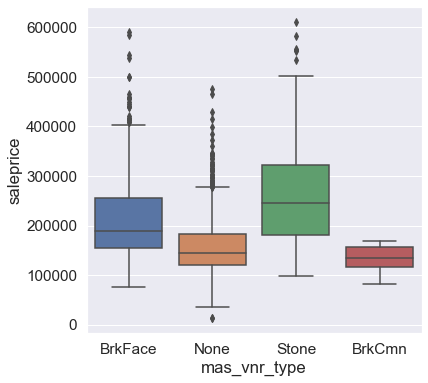

In [213]:
# Drawing a Boxplot to see Mas Vnr Type and SalePrice
plt.figure(figsize=(6,6))
mvt = sns.boxplot(x="mas_vnr_type", y="saleprice", data=train_eda)
mvt.set_xticklabels(mvt.get_xticklabels(), rotation=0);

In [214]:
train_eda['mas_vnr_type'].value_counts()

None       1239
BrkFace     630
Stone       167
BrkCmn       12
Name: mas_vnr_type, dtype: int64

**Decision:**
- Keeping this feature as the different entries like BrkFace and Stone or None have different median sale prices

# 23. Mas Vnr Area

Mas Vnr Area (Continuous): Masonry veneer area in square feet

C:\Users\User\AppData\Local\Temp/ipykernel_29508/1651519062.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  mva.set_xticklabels(mva.get_xticklabels(), rotation=0);


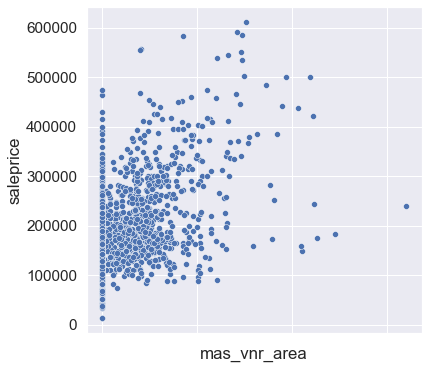

In [215]:
# Drawing a Scatterplot to see Mas Vnr Area and SalePrice
plt.figure(figsize=(6,6))
mva = sns.scatterplot(x="mas_vnr_area", y="saleprice", data=train_eda)
mva.set_xticklabels(mva.get_xticklabels(), rotation=0);

There seems to be some outliers we should remove and then reasses the correlation between Mas Vnr Area and SalePrice

In [216]:
train_eda['mas_vnr_area'].sort_values(ascending=False).reset_index().head()

,index,mas_vnr_area
0,1409,1600.0
1,1884,1224.0
2,1151,1129.0
3,378,1115.0
4,489,1110.0


In [217]:
# Drop rows with the outliers for Lot Area
#train_eda.drop(index=1409, axis=0, inplace=True)
train_eda.drop(index=1884, axis=0, inplace=True)

In [218]:
test_eda['mas_vnr_area'].sort_values(ascending=False).reset_index().head()

,index,mas_vnr_area
0,115,1378.0
1,551,1290.0
2,259,1224.0
3,463,1170.0
4,635,1159.0


In [219]:
# Doing the same for test data
#test_eda.drop(index=115, axis=0, inplace=True)
#test_eda.drop(index=551, axis=0, inplace=True)
#test_eda.drop(index=259, axis=0, inplace=True)

In [220]:
corr_check("mas_vnr_area", "saleprice")

0.5075866291963352

**Decision:**
- We will keep this feature as there is a positive correlation between mas_vnr_area and sale price

# 24. Exter Qual

Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 

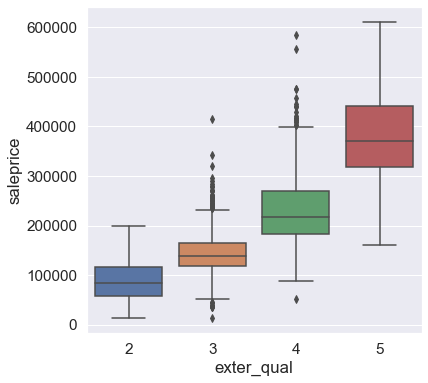

In [221]:
# Drawing a Boxplot to see Year Exter Qual and SalePrice
plt.figure(figsize=(6,6))
eq = sns.boxplot(x="exter_qual", y="saleprice", data=train_eda)
eq.set_xticklabels(eq.get_xticklabels(), rotation=0);

In [222]:
train_eda['exter_qual'].value_counts()

3    1245
4     696
5      80
2      26
Name: exter_qual, dtype: int64

**Decision:**
- Even though Average/Typical quality of the material on the exterior has the majority of entries, if the quality of material is Excellent it has an effect on sale price so this feature will be kept

# 25. Exter Cond

Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior

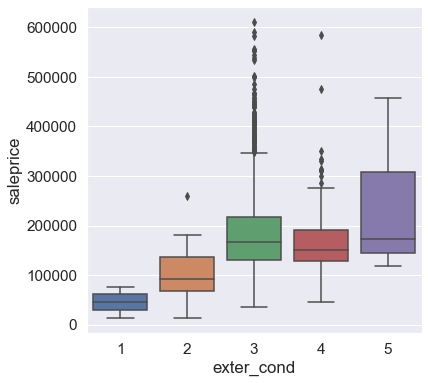

In [223]:
# Drawing a Boxplot to see Year Exter Cond and SalePrice
plt.figure(figsize=(6,6))
ec = sns.boxplot(x="exter_cond", y="saleprice", data=train_eda)
ec.set_xticklabels(ec.get_xticklabels(), rotation=0);

In [224]:
train_eda['exter_cond'].value_counts()

3    1774
4     215
2      49
5       7
1       2
Name: exter_cond, dtype: int64

**Decision:**
- Keeping as this feature looks similar to that of Exter Qual

# 26. Foundation

Foundation (Nominal): Type of foundation

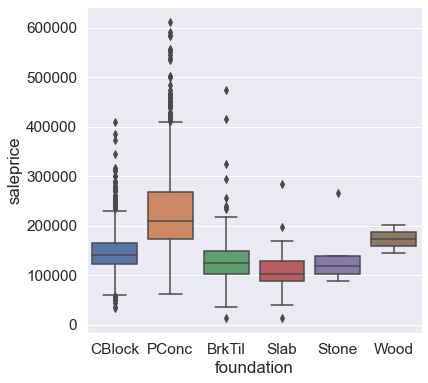

In [225]:
# Drawing a Boxplot to see Year Foundation and SalePrice
plt.figure(figsize=(6,6))
fo = sns.boxplot(x="foundation", y="saleprice", data=train_eda)
fo.set_xticklabels(fo.get_xticklabels(), rotation=0);

In [226]:
train_eda['foundation'].value_counts()

PConc     925
CBlock    861
BrkTil    220
Slab       34
Stone       5
Wood        2
Name: foundation, dtype: int64

**Decision:**
- Keeping this feature as housing foundation seems to have an association with sale price

# 27. Bsmt Qual

Bsmt Qual (Ordinal): Evaluates the height of the basement

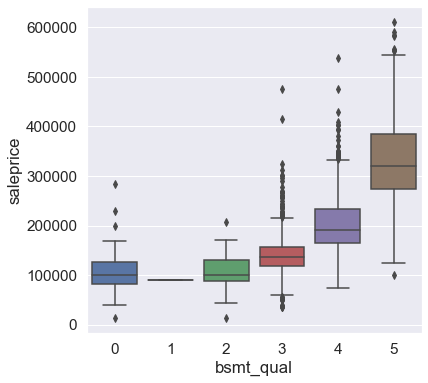

In [227]:
# Drawing a Boxplot to see Year Bsmt Qual and SalePrice
plt.figure(figsize=(6,6))
bq = sns.boxplot(x="bsmt_qual", y="saleprice", data=train_eda)
bq.set_xticklabels(bq.get_xticklabels(), rotation=0);

In [228]:
train_eda['bsmt_qual'].value_counts()

3    887
4    861
5    183
2     60
0     55
1      1
Name: bsmt_qual, dtype: int64

**Decision:**
- Keeping this feature as Excellent Basement quality seems to have an association with sale price

# 28. Bsmt Cond

Bsmt Cond (Ordinal): Evaluates the general condition of the basement

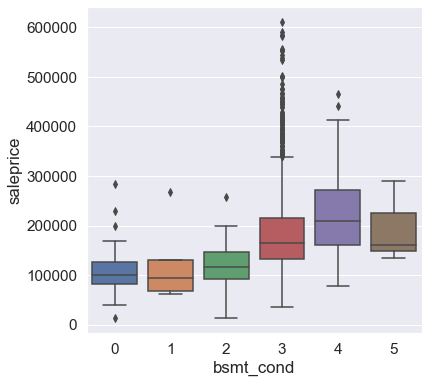

In [229]:
# Drawing a Boxplot to see Year Bsmt Cond and SalePrice
plt.figure(figsize=(6,6))
bc = sns.boxplot(x="bsmt_cond", y="saleprice", data=train_eda)
bc.set_xticklabels(bc.get_xticklabels(), rotation=0);

In [230]:
train_eda['bsmt_cond'].value_counts()

3    1830
4      89
2      65
0      55
1       5
5       3
Name: bsmt_cond, dtype: int64

**Decision:**
- Majority of the houses are Typical - slight dampness allowed
- Good Basements have a higher median price
- Keeping this feature as overall Basement quality seems to have an association with sale price

# 29. Bsmt Exposure

Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

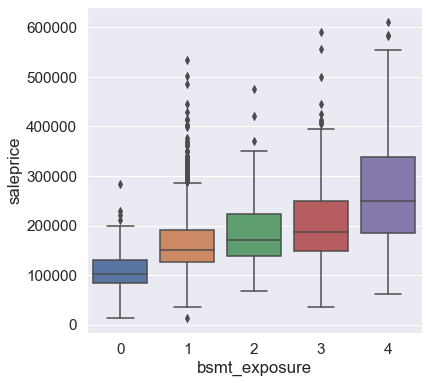

In [231]:
# Drawing a Boxplot to see Year Bsmt Exposure and SalePrice
plt.figure(figsize=(6,6))
be = sns.boxplot(x="bsmt_exposure", y="saleprice", data=train_eda)
be.set_xticklabels(be.get_xticklabels(), rotation=0);

In [232]:
train_eda['bsmt_exposure'].value_counts()

1    1338
3     288
4     200
2     163
0      58
Name: bsmt_exposure, dtype: int64

**Decision:**
- Housese without basement or proper exposure has lower sale price
- Keeping this feature due to association with sale price

# 30. BsmtFin Type 1

BsmtFin Type 1	(Ordinal): Rating of basement finished area

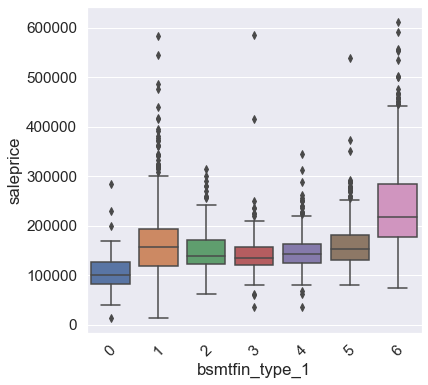

In [233]:
# Drawing a Boxplot to see Year BsmtFin Type 1 and SalePrice
plt.figure(figsize=(6,6))
bt1 = sns.boxplot(x="bsmtfin_type_1", y="saleprice", data=train_eda)
bt1.set_xticklabels(bt1.get_xticklabels(), rotation=45);

In [234]:
train_eda['bsmtfin_type_1'].value_counts()

6    613
1    603
5    292
4    200
3    182
2    102
0     55
Name: bsmtfin_type_1, dtype: int64

**Decision:**
- Good living quality houses have a higher price
- No Basements have a lower median price
- Keeping this feature due to association with sale price

# 31. BsmtFin SF 1

BsmtFin SF 1 (Continuous): Type 1 finished square feet

C:\Users\User\AppData\Local\Temp/ipykernel_29508/923985751.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  bt1.set_xticklabels(bt1.get_xticklabels(), rotation=0);


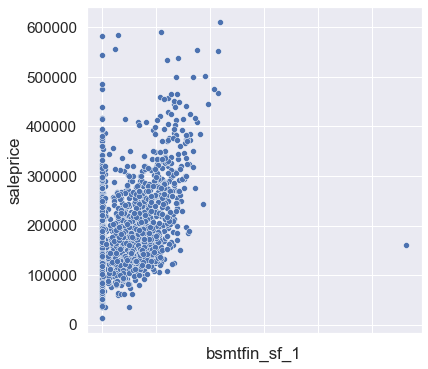

In [235]:
# Drawing a Scatterplot to see Year BsmtFin SF 1 and SalePrice
plt.figure(figsize=(6,6))
bt1 = sns.scatterplot(x="bsmtfin_sf_1", y="saleprice", data=train_eda)
bt1.set_xticklabels(bt1.get_xticklabels(), rotation=0);

In [236]:
# Removing outliers in bsmtfin_sf_1
train_eda['bsmtfin_sf_1'].sort_values(ascending=False).reset_index().head()

,index,bsmtfin_sf_1
0,960,5644.0
1,1671,2188.0
2,685,2158.0
3,623,2146.0
4,1158,2085.0


In [237]:
# Drop rows with the outliers for bsmtfin_sf_1
train_eda.drop(index=960, axis=0, inplace=True)

In [238]:
corr_check("bsmtfin_sf_1", "saleprice")

0.4452972317705011

In [239]:
# Removing the outlier for test data
test_eda['bsmtfin_sf_1'].sort_values(ascending=False).reset_index().head

<bound method NDFrame.head of      index  bsmtfin_sf_1
0      163          2288
1      103          2257
2      170          2096
3      628          1965
4      826          1836
..     ...           ...
873    436             0
874    435             0
875    434             0
876    433             0
877    439             0

[878 rows x 2 columns]>

In [240]:
# Drop rows with the outliers for bsmtfin_sf_1
#test_eda.drop(index=163, axis=0, inplace=True)

# 32. BsmtFinType 2

BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

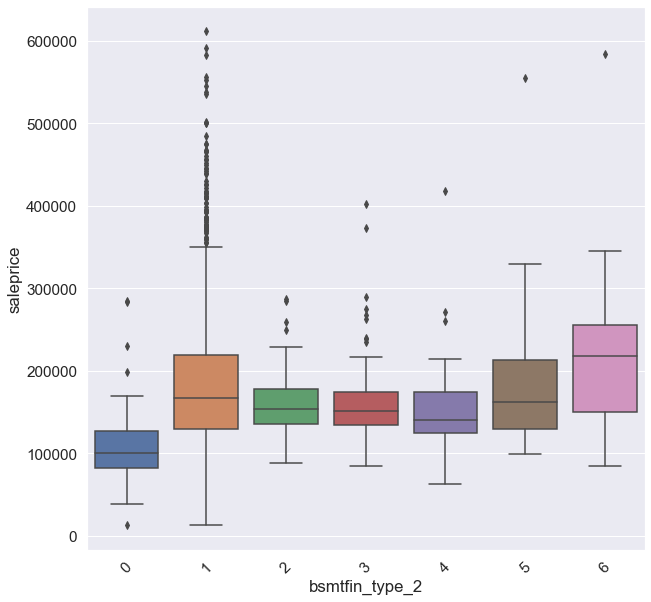

In [241]:
# Drawing a Boxplot to see Year BsmtFinType 2 and SalePrice
plt.figure(figsize=(10,10))
bt2 = sns.boxplot(x="bsmtfin_type_2", y="saleprice", data=train_eda)
bt2.set_xticklabels(bt2.get_xticklabels(), rotation=45);

In [242]:
train_eda['bsmtfin_type_2'].value_counts()

1    1744
3      80
2      60
0      56
4      48
5      35
6      23
Name: bsmtfin_type_2, dtype: int64

**Decision:**
- Most of the basements are unfinished, and do not seem to have large of an impact on sale price so we will drop this

In [243]:
# Dropping BsmtFinType 2 in Train and Test
train_eda.drop(["bsmtfin_type_2"], axis=1, inplace=True)
test_eda.drop(["bsmtfin_type_2"], axis=1, inplace=True)

# 32. Bsmt Unf SF

Bsmt Unf SF (Continuous): Unfinished square feet of basement area

C:\Users\User\AppData\Local\Temp/ipykernel_29508/321330657.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  bus.set_xticklabels(bus.get_xticklabels(), rotation=45);


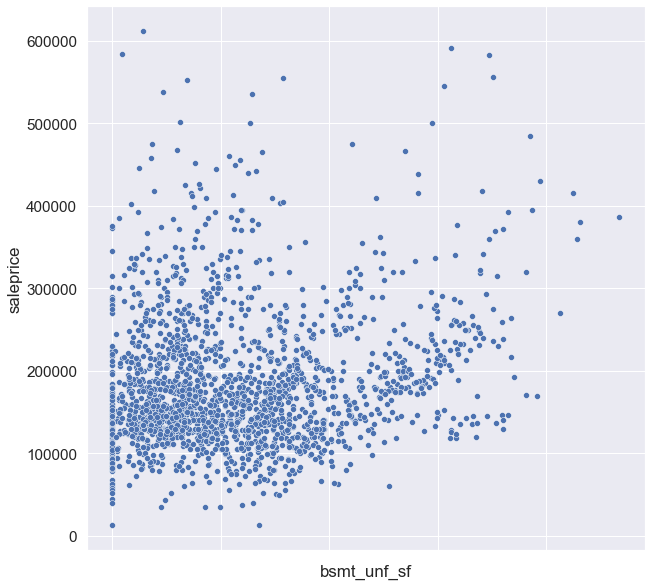

In [244]:
# Drawing a Scatterplot to see Year Bsmt Unf SF and SalePrice
plt.figure(figsize=(10,10))
bus = sns.scatterplot(x="bsmt_unf_sf", y="saleprice", data=train_eda)
bus.set_xticklabels(bus.get_xticklabels(), rotation=45);

In [245]:
corr_check("bsmt_unf_sf", "saleprice")

0.19098660970728035

**Decision:**
- Unfinished square feet of basement area do not seem to have large of an impact on sale price so we will drop this

In [246]:
# Dropping bsmt_unf_sf in Train and Test
train_eda.drop(["bsmt_unf_sf"], axis=1, inplace=True)
test_eda.drop(["bsmt_unf_sf"], axis=1, inplace=True)

# 33. Total Bsmt SF

Total Bsmt SF (Continuous): Total square feet of basement area

C:\Users\User\AppData\Local\Temp/ipykernel_29508/3069998337.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  tbs.set_xticklabels(tbs.get_xticklabels(), rotation=45);


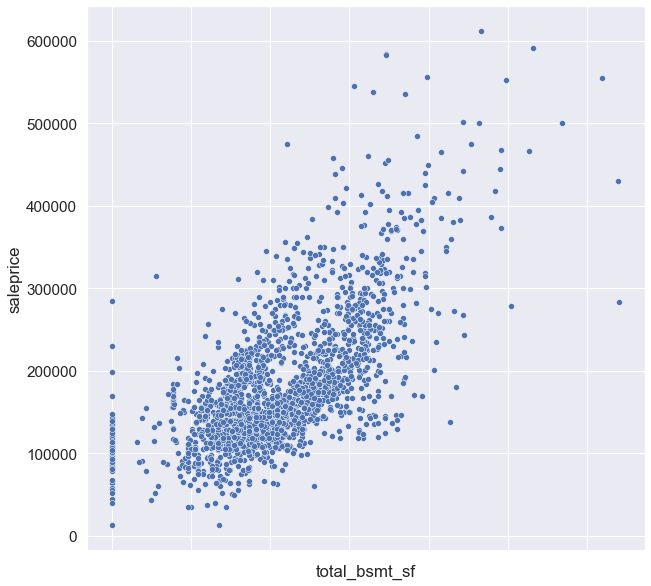

In [247]:
# Drawing a Scatterplot to see Year Total Bsmt SF and SalePrice
plt.figure(figsize=(10,10))
tbs = sns.scatterplot(x="total_bsmt_sf", y="saleprice", data=train_eda)
tbs.set_xticklabels(tbs.get_xticklabels(), rotation=45);

In [248]:
corr_check("total_bsmt_sf", "saleprice")

0.664579679906126

**Decision:**
- There is a positive correlation between Total Bsmt SF and SalePrice

# 34. Heating

Heating	(Nominal): Type of heating

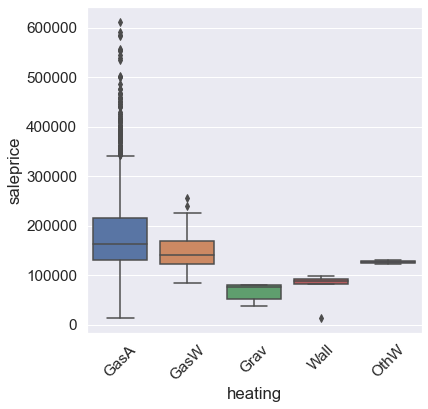

In [249]:
# Drawing a Boxplot to see Year Heating and SalePrice
plt.figure(figsize=(6,6))
h = sns.boxplot(x="heating", y="saleprice", data=train_eda)
h.set_xticklabels(h.get_xticklabels(), rotation=45);

In [250]:
train_eda['heating'].value_counts()

GasA    2013
GasW      20
Wall       6
Grav       5
OthW       2
Name: heating, dtype: int64

**Decision:**
- A majority of the heating in houses is GasA type
- Therefore this does not really illuminate much on sale price so we will drop this

In [251]:
# Dropping Heating in Train and Test
train_eda.drop(["heating"], axis=1, inplace=True)
test_eda.drop(["heating"], axis=1, inplace=True)

# 35. HeatingQC

HeatingQC (Ordinal): Heating quality and condition

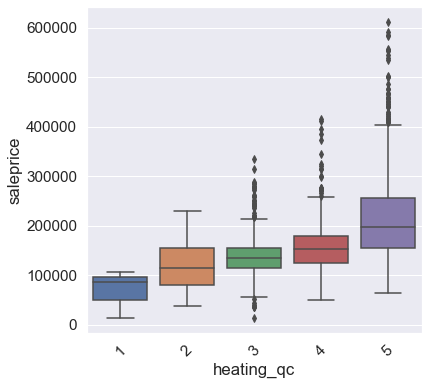

In [252]:
# Drawing a Boxplot to see Year HeatingQC and SalePrice
plt.figure(figsize=(6,6))
hq = sns.boxplot(x="heating_qc", y="saleprice", data=train_eda)
hq.set_xticklabels(hq.get_xticklabels(), rotation=45);

In [253]:
train_eda['heating_qc'].value_counts()

5    1062
3     596
4     318
2      67
1       3
Name: heating_qc, dtype: int64

**Decision:**
- Keeping HeatingQC as we can see Excellent Heating results in a higher sales price

# 36. Central Air

Central Air (Nominal): Central air conditioning

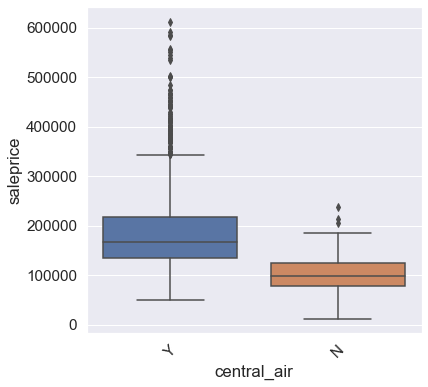

In [254]:
# Drawing a Boxplot to see Year HeatingQC and SalePrice
plt.figure(figsize=(6,6))
ca = sns.boxplot(x="central_air", y="saleprice", data=train_eda)
ca.set_xticklabels(ca.get_xticklabels(), rotation=45);

In [255]:
train_eda['central_air'].value_counts()

Y    1905
N     141
Name: central_air, dtype: int64

**Decision:**
- Keeping Central Air as we can see houses with central air conditioning results in a higher sales price

# 37. Electrical

Electrical (Ordinal): Electrical system

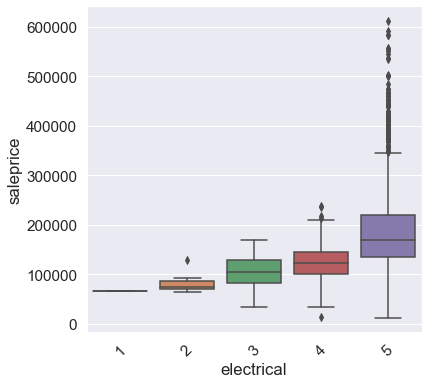

In [256]:
# Drawing a Boxplot to see Year Electrical and SalePrice
plt.figure(figsize=(6,6))
e = sns.boxplot(x="electrical", y="saleprice", data=train_eda)
e.set_xticklabels(e.get_xticklabels(), rotation=45);

In [257]:
train_eda['electrical'].value_counts()

5    1863
4     140
3      35
2       7
1       1
Name: electrical, dtype: int64

**Decision:**
- Even though a majority of electrical systems in the houses are Standard Circuit Breakers & Romex, SBrKr does command a higher sale price than others so we will keep this

# 38-40. Flr SF vs. Gr Liv Area 

1st Flr SF (Continuous): First Floor square feet
2nd Flr SF (Continuous)	: Second floor square feet
Gr Liv Area (Continuous): Above grade (ground) living area square feet

C:\Users\User\AppData\Local\Temp/ipykernel_29508/1658775954.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fs1.set_xticklabels(fs1.get_xticklabels(), rotation=45);


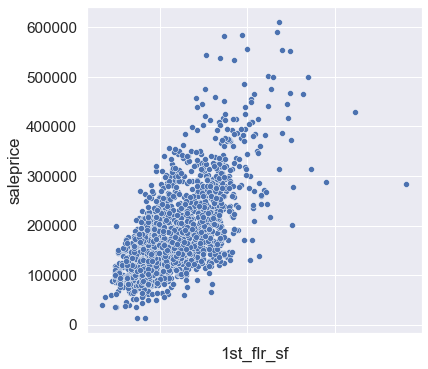

In [258]:
# Drawing a Scatterplot to see Year 1st Flr SF and SalePrice
plt.figure(figsize=(6,6))
fs1 = sns.scatterplot(x="1st_flr_sf", y="saleprice", data=train_eda)
fs1.set_xticklabels(fs1.get_xticklabels(), rotation=45);

In [259]:
corr_check("1st_flr_sf", "saleprice")

0.6476479847913754

C:\Users\User\AppData\Local\Temp/ipykernel_29508/1408290041.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fs2.set_xticklabels(fs2.get_xticklabels(), rotation=45);


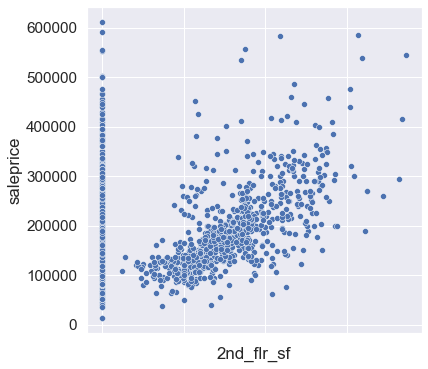

In [260]:
# Drawing a Scatterplot to see 2nd Flr SF and SalePrice
plt.figure(figsize=(6,6))
fs2 = sns.scatterplot(x="2nd_flr_sf", y="saleprice", data=train_eda)
fs2.set_xticklabels(fs2.get_xticklabels(), rotation=45);

In [261]:
corr_check("2nd_flr_sf", "saleprice")

0.2495579685326831

C:\Users\User\AppData\Local\Temp/ipykernel_29508/3361517221.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  gla.set_xticklabels(gla.get_xticklabels(), rotation=45);


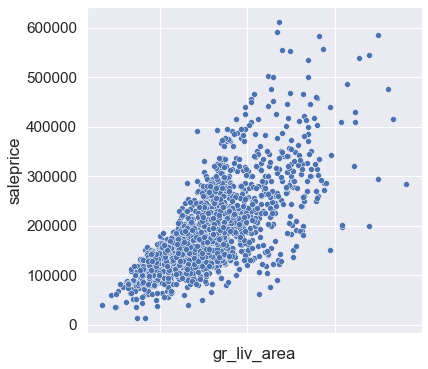

In [262]:
# Drawing a Scatterplot to see gr_liv_area and SalePrice
plt.figure(figsize=(6,6))
gla = sns.scatterplot(x="gr_liv_area", y="saleprice", data=train_eda)
gla.set_xticklabels(gla.get_xticklabels(), rotation=45);

In [263]:
corr_check("gr_liv_area", "saleprice")

0.7194670277322974

**Decision:**
- Since 1st Flr SF and 2nd Flr SF are cumulatively the same as Gr Liv Area but we see a more positive cporrelation with Sales Price for Gr Liv Area rather than 1st Flr SF and 2nd Flr SF
- Therefore we will keep Gr Liv Area and drop the 2 other features

In [264]:
# Dropping 1st Flr SF and 2nd Flr SF in Train and Test
train_eda.drop(["1st_flr_sf"], axis=1, inplace=True)
test_eda.drop(["1st_flr_sf"], axis=1, inplace=True)
train_eda.drop(["2nd_flr_sf"], axis=1, inplace=True)
test_eda.drop(["2nd_flr_sf"], axis=1, inplace=True)

# 41. Low Qual Fin SF

Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)

C:\Users\User\AppData\Local\Temp/ipykernel_29508/2419746329.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  lqf.set_xticklabels(lqf.get_xticklabels(), rotation=45);


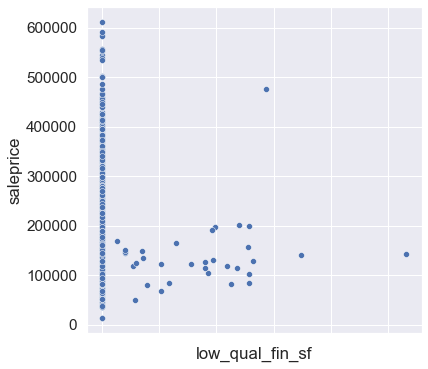

In [265]:
# Drawing a Scatterplot to see Low Qual Fin SFand SalePrice
plt.figure(figsize=(6,6))
lqf = sns.scatterplot(x="low_qual_fin_sf", y="saleprice", data=train_eda)
lqf.set_xticklabels(lqf.get_xticklabels(), rotation=45);

In [266]:
corr_check("low_qual_fin_sf", "saleprice")

-0.0415244967569776

**Decision:**
- Dropping Low Qual Fin SF as there is very low correlation with Sales Price

In [267]:
# Dropping Low Qual Fin SF in Train and Test
train_eda.drop(["low_qual_fin_sf"], axis=1, inplace=True)
test_eda.drop(["low_qual_fin_sf"], axis=1, inplace=True)

# 42-43. Bsmt Bath

Bsmt Full Bath (Discrete): Basement full bathrooms
Bsmt Half Bath (Discrete): Basement half bathrooms

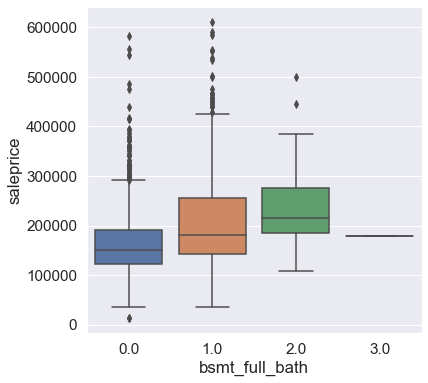

In [268]:
# Drawing a Boxplot to see Year Bsmt Full Bath and SalePrice
plt.figure(figsize=(6,6))
bfb = sns.boxplot(x="bsmt_full_bath", y="saleprice", data=train_eda)
bfb.set_xticklabels(bfb.get_xticklabels(), rotation=0);

In [269]:
train_eda['bsmt_full_bath'].value_counts()

0.0    1200
1.0     822
2.0      22
3.0       2
Name: bsmt_full_bath, dtype: int64

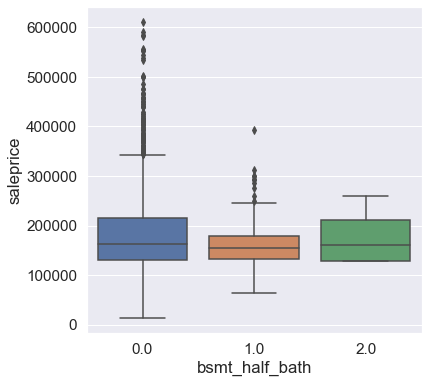

In [270]:
# Drawing a Boxplot to see Year Bsmt Half Bath and SalePrice
plt.figure(figsize=(6,6))
bhb = sns.boxplot(x="bsmt_half_bath", y="saleprice", data=train_eda)
bhb.set_xticklabels(bhb.get_xticklabels(), rotation=0);

In [271]:
train_eda['bsmt_half_bath'].value_counts()

0.0    1922
1.0     120
2.0       4
Name: bsmt_half_bath, dtype: int64

**Decision:**
- If the house has basment full bath the sales price tends to be higher
- Whereas a lot of houses do not have basement half bath and those that do do not have a higher sales price
- I will remove basement half bath

In [272]:
# Dropping Bsmt Half Bath in Train and Test
train_eda.drop(["bsmt_half_bath"], axis=1, inplace=True)
test_eda.drop(["bsmt_half_bath"], axis=1, inplace=True)

# 44-45. Full and Half Bath

Full Bath (Discrete): Full bathrooms above grade
Half Bath (Discrete): Half baths above grade

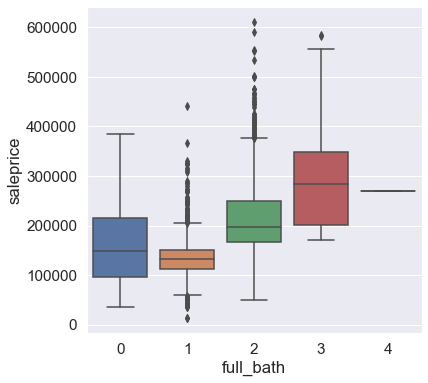

In [273]:
# Drawing a Boxplot to see Year Full Bath and SalePrice
plt.figure(figsize=(6,6))
fb = sns.boxplot(x="full_bath", y="saleprice", data=train_eda)
fb.set_xticklabels(fb.get_xticklabels(), rotation=0);

In [274]:
train_eda['full_bath'].value_counts()

2    1091
1     900
3      45
0       8
4       2
Name: full_bath, dtype: int64

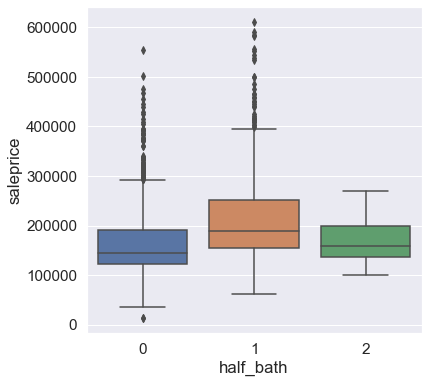

In [275]:
# Drawing a Boxplot to see Year Half Bath and SalePrice
plt.figure(figsize=(6,6))
hb = sns.boxplot(x="half_bath", y="saleprice", data=train_eda)
hb.set_xticklabels(hb.get_xticklabels(), rotation=0);

In [276]:
train_eda['half_bath'].value_counts()

0    1305
1     723
2      18
Name: half_bath, dtype: int64

In [277]:
corr_check("half_bath", "saleprice")

0.2846034603390649

**Decision:**
- If the house has Full bath the sales price tends to be higher
- Whereas half bath correlation with sales price is relatively low
- I will remove half bath

In [278]:
# Dropping Bsmt Half Bath in Train and Test
train_eda.drop(["half_bath"], axis=1, inplace=True)
test_eda.drop(["half_bath"], axis=1, inplace=True)

# 46-47. BedroomAbvGrd & TotRmsAbvGrd

Bedroom (Discrete): Bedrooms above grade (does NOT include basement bedrooms)
TotRmsAbvGrd	(Discrete): Total rooms above grade (does not include bathrooms)

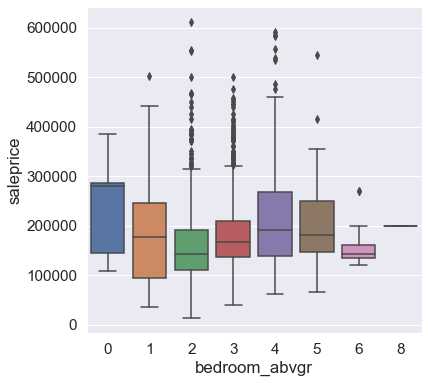

In [279]:
# Drawing a Boxplot to see Year Bedroom and SalePrice
plt.figure(figsize=(6,6))
b = sns.boxplot(x="bedroom_abvgr", y="saleprice", data=train_eda)
b.set_xticklabels(b.get_xticklabels(), rotation=0);

In [280]:
train_eda['bedroom_abvgr'].value_counts()

3    1106
2     542
4     264
1      75
5      41
6      12
0       5
8       1
Name: bedroom_abvgr, dtype: int64

In [281]:
corr_check("bedroom_abvgr", "saleprice")

0.13734842901394034

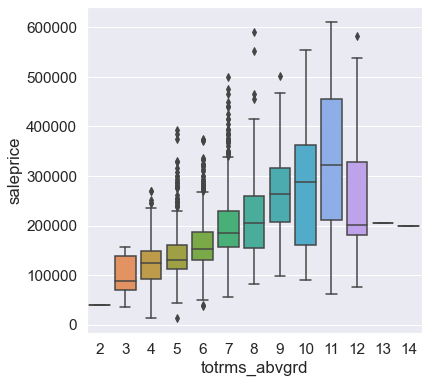

In [282]:
# Drawing a Boxplot to see Year TotRmsAbvGrd and SalePrice
plt.figure(figsize=(6,6))
ta = sns.boxplot(x="totrms_abvgrd", y="saleprice", data=train_eda)
ta.set_xticklabels(ta.get_xticklabels(), rotation=0);

In [283]:
train_eda['totrms_abvgrd'].value_counts()

6     596
7     474
5     406
8     228
4     146
9      98
10     49
11     22
12     12
3      12
14      1
2       1
13      1
Name: totrms_abvgrd, dtype: int64

In [284]:
corr_check("totrms_abvgrd", "saleprice")

0.510814239471926

**Decision:**
- Number of bedrooms do not have as strong an association with sales price
- Yet the total number of rooms does have an affect on the median sales price
- We will drop bedroom but keep total number of rooms

In [285]:
# Dropping Bsmt Half Bath in Train and Test
train_eda.drop(["bedroom_abvgr"], axis=1, inplace=True)
test_eda.drop(["bedroom_abvgr"], axis=1, inplace=True)

# 48. Kitchen

Kitchen (Discrete): Kitchens above grade

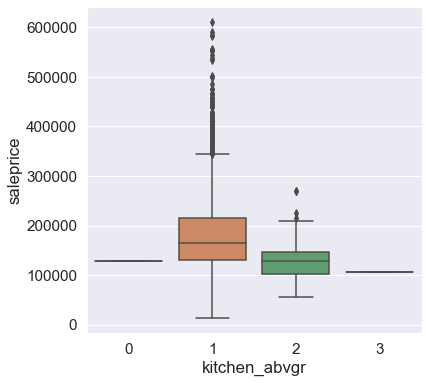

In [286]:
# Drawing a Boxplot to see Kitchen and SalePrice
plt.figure(figsize=(6,6))
ka = sns.boxplot(x="kitchen_abvgr", y="saleprice", data=train_eda)
ka.set_xticklabels(ka.get_xticklabels(), rotation=0);

In [287]:
train_eda['kitchen_abvgr'].value_counts()

1    1955
2      88
0       2
3       1
Name: kitchen_abvgr, dtype: int64

**Decision:**
- If a house has 2 kitchens rather than 1 the sale price decreases, hence this will be kept

# 49. KitchenQual

KitchenQual (Ordinal): Kitchen quality

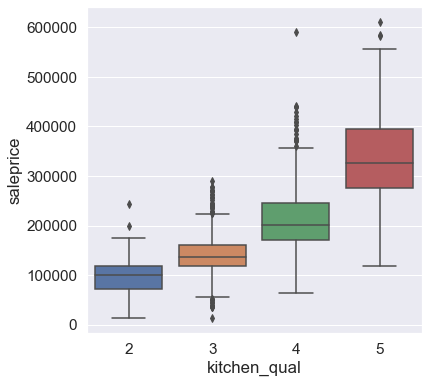

In [288]:
# Drawing a Boxplot to see KitchenQual and SalePrice
plt.figure(figsize=(6,6))
kq = sns.boxplot(x="kitchen_qual", y="saleprice", data=train_eda)
kq.set_xticklabels(kq.get_xticklabels(), rotation=0);

In [289]:
train_eda['kitchen_qual'].value_counts()

3    1047
4     803
5     149
2      47
Name: kitchen_qual, dtype: int64

**Decision:**
- Kitchens with excellent quality have a higher sale price, hence this will be kept

# 50. Functional

Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

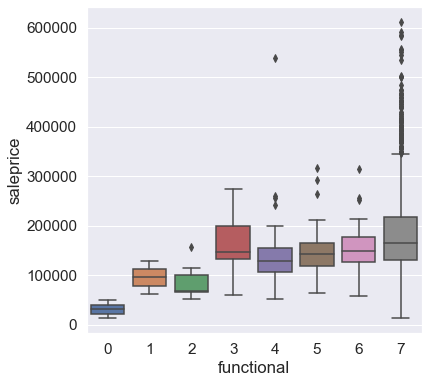

In [290]:
# Drawing a Boxplot to see Functional and SalePrice
plt.figure(figsize=(6,6))
f = sns.boxplot(x="functional", y="saleprice", data=train_eda)
f.set_xticklabels(f.get_xticklabels(), rotation=0);

In [291]:
train_eda['functional'].value_counts()

7    1910
5      42
6      42
4      29
3      12
2       7
1       2
0       2
Name: functional, dtype: int64

**Decision:**
- Houses with major deductions or severely damaged have lower sales price, so this will be kept

# 51-52. Fireplaces & FireplaceQu

Fireplaces (Discrete): Number of fireplaces
FireplaceQu (Ordinal): Fireplace quality

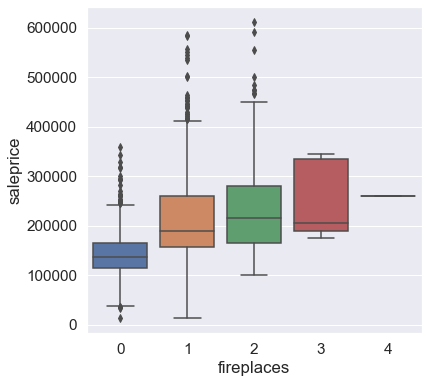

In [292]:
# Drawing a Boxplot to see Fireplaces and SalePrice
plt.figure(figsize=(6,6))
f = sns.boxplot(x="fireplaces", y="saleprice", data=train_eda)
f.set_xticklabels(f.get_xticklabels(), rotation=0);

In [293]:
train_eda['fireplaces'].value_counts()

0    999
1    898
2    143
3      5
4      1
Name: fireplaces, dtype: int64

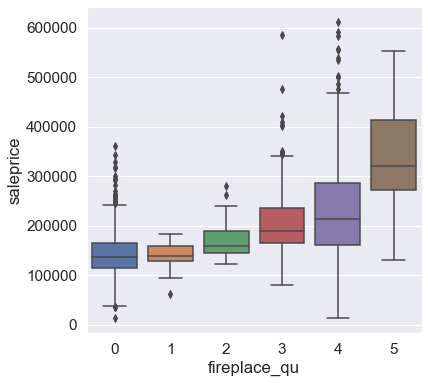

In [294]:
# Drawing a Boxplot to see FireplaceQu and SalePrice
plt.figure(figsize=(6,6))
fq = sns.boxplot(x="fireplace_qu", y="saleprice", data=train_eda)
fq.set_xticklabels(fq.get_xticklabels(), rotation=0);

In [295]:
train_eda['fireplace_qu'].value_counts()

0    999
4    521
3    405
2     59
1     31
5     31
Name: fireplace_qu, dtype: int64

**Decision:**
- Houses with a fireplace have a higher sales price, so this will be kept
- The better the quality of the fireplace, the higher the sale price, so this will also be kept

# 53-60. Garage

Garage Type (Nominal): Garage location
Garage Yr Blt (Discrete): Year garage was built
Garage Finish (Ordinal)	: Interior finish of the garage
Garage Cars (Discrete): Size of garage in car capacity
Garage Area (Continuous): Size of garage in square feet
Garage Qual (Ordinal): Garage quality
Garage Cond (Ordinal): Garage condition

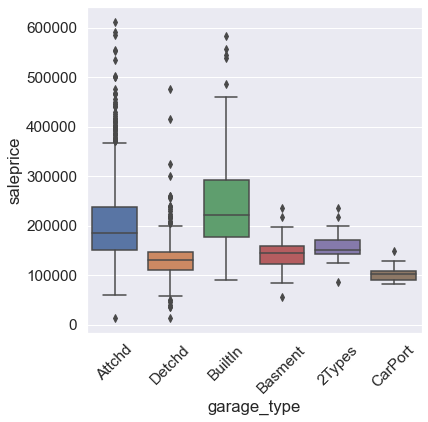

In [296]:
# Drawing a Boxplot to see Garage Yr Blt and SalePrice
plt.figure(figsize=(6,6))
gt = sns.boxplot(x="garage_type", y="saleprice", data=train_eda)
gt.set_xticklabels(gt.get_xticklabels(), rotation=45);

In [297]:
train_eda['garage_type'].value_counts()

Attchd     1209
Detchd      535
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: garage_type, dtype: int64

**Decision:**
- Keeping as garage types that are Attchd or BuiltIn have a higher sales price

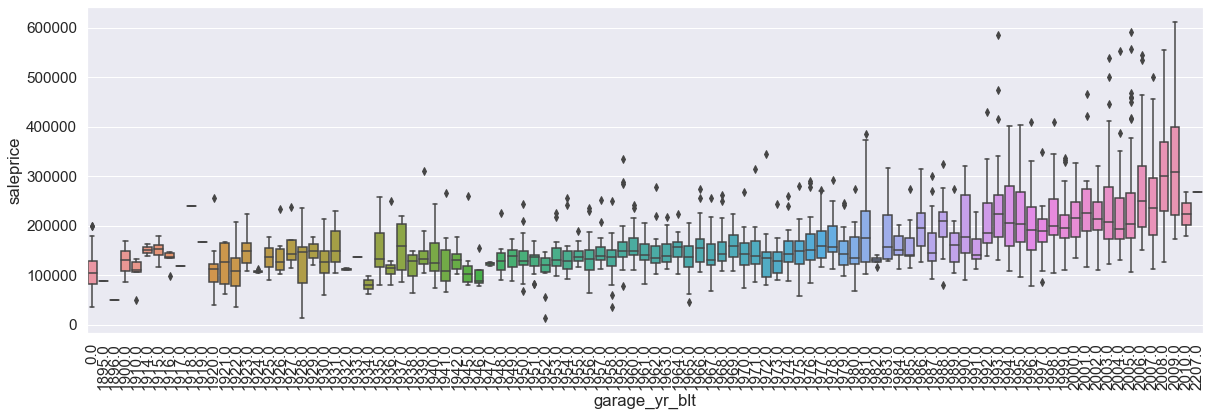

In [298]:
# Drawing a boxplot to see Garage Yr Blt and SalePrice
plt.figure(figsize=(20,6))
gyb = sns.boxplot(x="garage_yr_blt", y="saleprice", data=train_eda)
gyb.set_xticklabels(gyb.get_xticklabels(), rotation=90);

The last year is 2207, which is clearly an error, so we need to remove this entry

In [299]:
# Removing wrong entry in garage_yr_blt
train_eda['garage_yr_blt'].sort_values(ascending=False).reset_index().head()

,index,garage_yr_blt
0,1699,2207.0
1,1241,2010.0
2,144,2010.0
3,172,2009.0
4,1671,2009.0


In [300]:
# Drop rows with garage_yr_blt in Train
train_eda.drop(index=1699, axis=0, inplace=True)

In [301]:
# Removing wrong entry in garage_yr_blt
test_eda['garage_yr_blt'].sort_values(ascending=False).reset_index().head()

,index,garage_yr_blt
0,452,2010.0
1,316,2010.0
2,315,2010.0
3,323,2009.0
4,608,2009.0


- The incorrect value is not in Test data

**Decision:**
- Keeping as garage yr built after 1990 especially has an increase in sale price

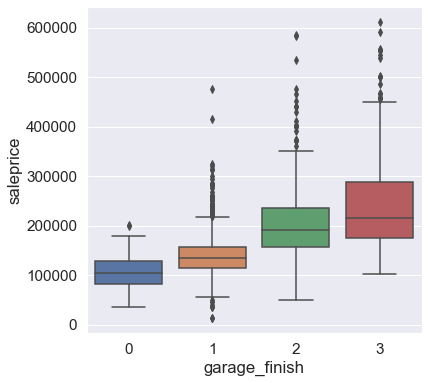

In [302]:
# Drawing a Boxplot to see Garage Finish and SalePrice
plt.figure(figsize=(6,6))
gf = sns.boxplot(x="garage_finish", y="saleprice", data=train_eda)
gf.set_xticklabels(gf.get_xticklabels(), rotation=0);

In [303]:
train_eda['garage_finish'].value_counts()

1    848
2    578
3    506
0    113
Name: garage_finish, dtype: int64

**Decision:**
- Keeping as garage yr built after 1990 especially has an increase in sale price

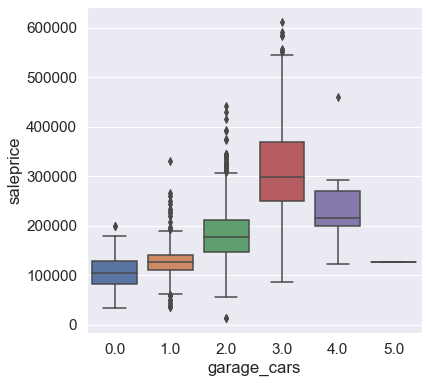

In [304]:
# Drawing a Boxplot to see Garage Cars and SalePrice
plt.figure(figsize=(6,6))
gc = sns.boxplot(x="garage_cars", y="saleprice", data=train_eda)
gc.set_xticklabels(gc.get_xticklabels(), rotation=0);

In [305]:
train_eda['garage_cars'].value_counts()

2.0    1132
1.0     524
3.0     262
0.0     113
4.0      13
5.0       1
Name: garage_cars, dtype: int64

**Decision:**
- Keeping as the more number of cars that can fit into the garage, the higher the sale price

C:\Users\User\AppData\Local\Temp/ipykernel_29508/2898042056.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ga.set_xticklabels(ga.get_xticklabels(), rotation=0);


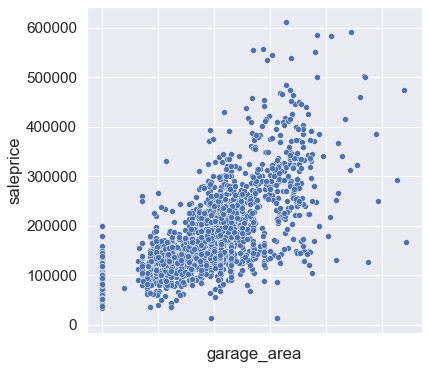

In [306]:
# Drawing a Scatterplot to see Garage Area and SalePrice
plt.figure(figsize=(6,6))
ga = sns.scatterplot(x="garage_area", y="saleprice", data=train_eda)
ga.set_xticklabels(ga.get_xticklabels(), rotation=0);

In [307]:
corr_check("garage_area", "saleprice")

0.6557841645753059

**Decision:**
- Keeping as there is a positive correlation between garage area and saleprice

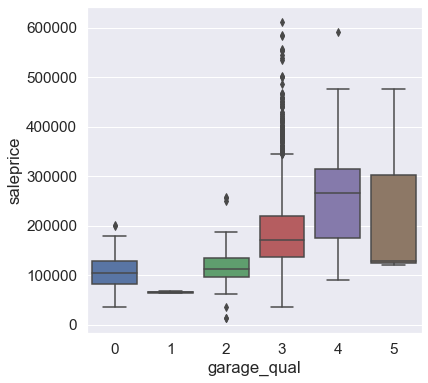

In [308]:
# Drawing a Boxplot to see Garage Qual and SalePrice
plt.figure(figsize=(6,6))
gq = sns.boxplot(x="garage_qual", y="saleprice", data=train_eda)
gq.set_xticklabels(gq.get_xticklabels(), rotation=0);

In [309]:
train_eda['garage_qual'].value_counts()

3    1827
0     113
2      82
4      18
5       3
1       2
Name: garage_qual, dtype: int64

**Decision:**
- Keeping because if the garage quality is good or excellent, the median sale price increases

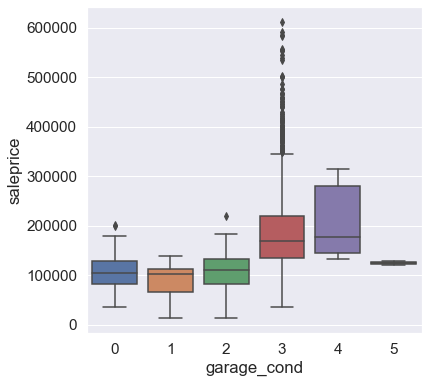

In [310]:
# Drawing a Boxplot to see Garage Cond and SalePrice
plt.figure(figsize=(6,6))
gc = sns.boxplot(x="garage_cond", y="saleprice", data=train_eda)
gc.set_xticklabels(gc.get_xticklabels(), rotation=0);

In [311]:
train_eda['garage_cond'].value_counts()

3    1863
0     113
2      47
4      12
1       8
5       2
Name: garage_cond, dtype: int64

**Decision:**
- Keeping as if the garage is Typical/Average it commands a higher sale price than if there is No Garage

# 61. Paved Drive

Paved Drive (Ordinal): Paved driveway

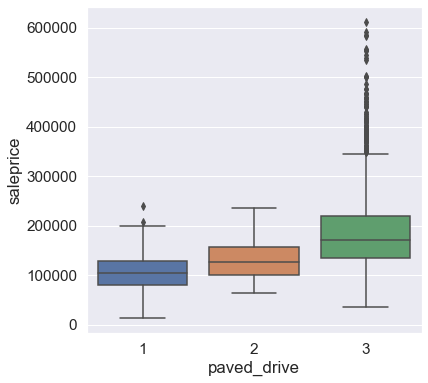

In [312]:
# Drawing a Boxplot to see Paved Drive and SalePrice
plt.figure(figsize=(6,6))
pd = sns.boxplot(x="paved_drive", y="saleprice", data=train_eda)
pd.set_xticklabels(pd.get_xticklabels(), rotation=0);

In [313]:
train_eda['paved_drive'].value_counts()

3    1855
1     151
2      39
Name: paved_drive, dtype: int64

**Decision:**
- Keeping because if the house does have a paved drive, the median sale price increases than if it does not

# 62. Wood Deck SF

Wood Deck SF (Continuous): Wood deck area in square feet

C:\Users\User\AppData\Local\Temp/ipykernel_29508/1530316890.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ga.set_xticklabels(ga.get_xticklabels(), rotation=0);


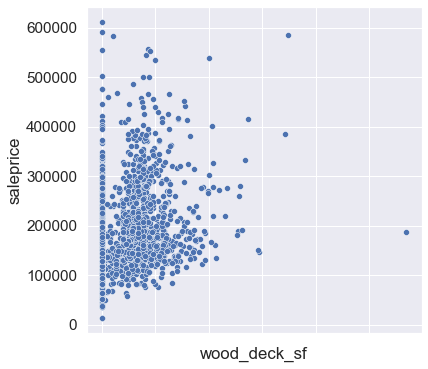

In [314]:
# Drawing a Scatterplot to see Wood Deck SF and SalePrice
plt.figure(figsize=(6,6))
ga = sns.scatterplot(x="wood_deck_sf", y="saleprice", data=train_eda)
ga.set_xticklabels(ga.get_xticklabels(), rotation=0);

In [315]:
corr_check("wood_deck_sf", "saleprice")

0.327244241072781

**Decision:**
- Dropping wood deck area as there is a low correlation with sale price

In [316]:
# Dropping Bsmt Half Bath in Train and Test
train_eda.drop(["wood_deck_sf"], axis=1, inplace=True)
test_eda.drop(["wood_deck_sf"], axis=1, inplace=True)

# 63-67. Porch

Open Porch SF (Continuous): Open porch area in square feet  
Enclosed Porch (Continuous): Enclosed porch area in square feet  
3-Ssn Porch (Continuous): Three season porch area in square feet  
Screen Porch (Continuous): Screen porch area in square feet

C:\Users\User\AppData\Local\Temp/ipykernel_29508/2764449262.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ops.set_xticklabels(ops.get_xticklabels(), rotation=0);


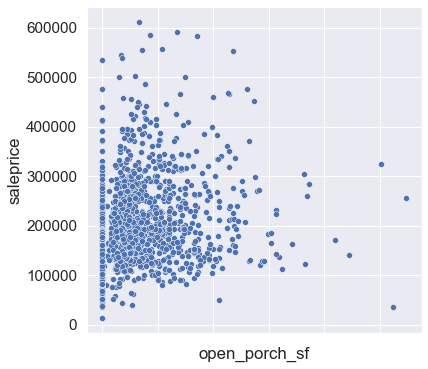

In [317]:
# Drawing a Scatterplot to see Open Porch SF and SalePrice
plt.figure(figsize=(6,6))
ops = sns.scatterplot(x="open_porch_sf", y="saleprice", data=train_eda)
ops.set_xticklabels(ops.get_xticklabels(), rotation=0);

In [318]:
corr_check("open_porch_sf", "saleprice")

0.338882616498687

C:\Users\User\AppData\Local\Temp/ipykernel_29508/939426642.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ep.set_xticklabels(ep.get_xticklabels(), rotation=0);


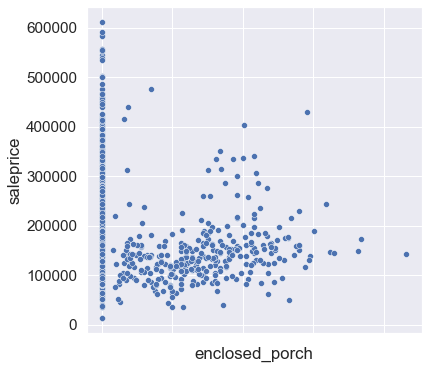

In [319]:
# Drawing a Scatterplot to see Enclosed Porch and SalePrice
plt.figure(figsize=(6,6))
ep = sns.scatterplot(x="enclosed_porch", y="saleprice", data=train_eda)
ep.set_xticklabels(ep.get_xticklabels(), rotation=0);

In [320]:
corr_check("enclosed_porch", "saleprice")

-0.13492891926462589

C:\Users\User\AppData\Local\Temp/ipykernel_29508/3543910163.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ps3.set_xticklabels(ps3.get_xticklabels(), rotation=0);


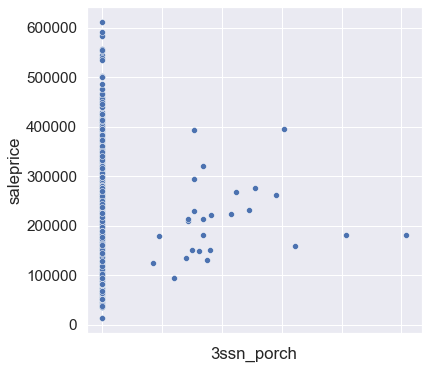

In [321]:
# Drawing a Scatterplot to see 3-Ssn Porch and SalePrice
plt.figure(figsize=(6,6))
ps3 = sns.scatterplot(x="3ssn_porch", y="saleprice", data=train_eda)
ps3.set_xticklabels(ps3.get_xticklabels(), rotation=0);

In [322]:
corr_check("3ssn_porch", "saleprice")

0.04895425579784636

C:\Users\User\AppData\Local\Temp/ipykernel_29508/3222876384.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ps3.set_xticklabels(ps3.get_xticklabels(), rotation=0);


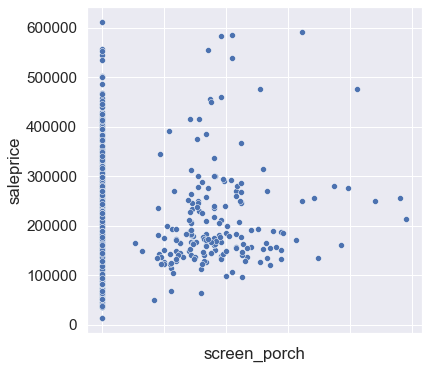

In [323]:
# Drawing a Scatterplot to see Screen Porch and SalePrice
plt.figure(figsize=(6,6))
ps3 = sns.scatterplot(x="screen_porch", y="saleprice", data=train_eda)
ps3.set_xticklabels(ps3.get_xticklabels(), rotation=0);

In [324]:
corr_check("screen_porch", "saleprice")

0.1352163270410301

**Decision:**
- Dropping Open Porch SF as there is a low correlation with sale price  
- Dropping Enclosed Porch as there is a low correlation with sale price
- Dropping 3-Ssn Porch as there is a low correlation with sale price
- Dropping Screen Porch as there is a low correlation with sale price

In [325]:
# Dropping Porch in Train and Test
train_eda.drop(["open_porch_sf"], axis=1, inplace=True)
test_eda.drop(["open_porch_sf"], axis=1, inplace=True)
train_eda.drop(["enclosed_porch"], axis=1, inplace=True)
test_eda.drop(["enclosed_porch"], axis=1, inplace=True)
train_eda.drop(["3ssn_porch"], axis=1, inplace=True)
test_eda.drop(["3ssn_porch"], axis=1, inplace=True)
train_eda.drop(["screen_porch"], axis=1, inplace=True)
test_eda.drop(["screen_porch"], axis=1, inplace=True)

# 68. Pool Area

Pool Area (Continuous): Pool area in square feet

C:\Users\User\AppData\Local\Temp/ipykernel_29508/742452236.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  pa.set_xticklabels(pa.get_xticklabels(), rotation=0);


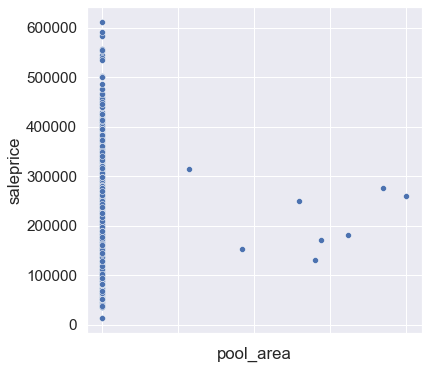

In [326]:
# Drawing a Scatterplot to see Screen Porch and SalePrice
plt.figure(figsize=(6,6))
pa = sns.scatterplot(x="pool_area", y="saleprice", data=train_eda)
pa.set_xticklabels(pa.get_xticklabels(), rotation=0);

In [327]:
corr_check("pool_area", "saleprice")

0.025937593100711392

**Decision:**
- Dropping Pool Area as there is a low correlation with sale price  

In [328]:
# Dropping Bsmt pool_area in Train and Test
train_eda.drop(["pool_area"], axis=1, inplace=True)
test_eda.drop(["pool_area"], axis=1, inplace=True)

# 69. Fence

Fence (Ordinal): Fence quality

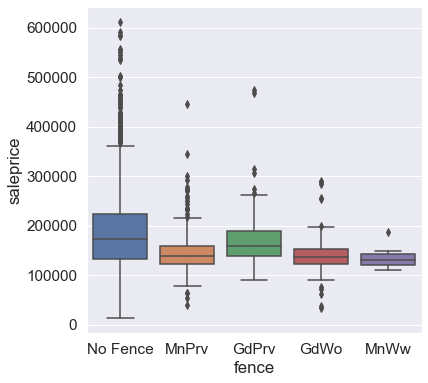

In [329]:
# Drawing a Boxplot to see Fence and SalePrice
plt.figure(figsize=(6,6))
fe = sns.boxplot(x="fence", y="saleprice", data=train_eda)
fe.set_xticklabels(fe.get_xticklabels(), rotation=0);

In [330]:
train_eda['fence'].value_counts()

No Fence    1646
MnPrv        226
GdPrv         83
GdWo          80
MnWw          10
Name: fence, dtype: int64

**Decision:**
- Removing this because majority of houses have no fences and those that do not necessarily have a positive association with sale price 

In [331]:
# Dropping fence in Train and Test
train_eda.drop(["fence"], axis=1, inplace=True)
test_eda.drop(["fence"], axis=1, inplace=True)

# 70. Misc Val

Misc Val (Continuous): $Value of miscellaneous feature

C:\Users\User\AppData\Local\Temp/ipykernel_29508/3939894309.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  mv.set_xticklabels(mv.get_xticklabels(), rotation=0);


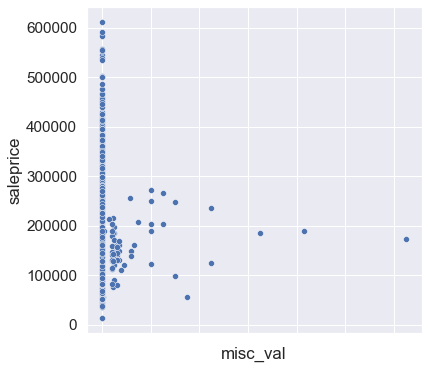

In [332]:
# Drawing a Boxplot to see Misc Val and SalePrice
plt.figure(figsize=(6,6))
mv = sns.scatterplot(x="misc_val", y="saleprice", data=train_eda)
mv.set_xticklabels(mv.get_xticklabels(), rotation=0);

In [333]:
corr_check("misc_val", "saleprice")

-0.010850161693730362

**Decision:**
- Dropping Misc Val as there is a low correlation with sale price  

In [334]:
# Dropping Misc Val in Train and Test
train_eda.drop(["misc_val"], axis=1, inplace=True)
test_eda.drop(["misc_val"], axis=1, inplace=True)

# 71-72. Mo Yr Sold

Mo Sold (Discrete): Month Sold (MM)
Yr Sold (Discrete): Year Sold (YYYY)

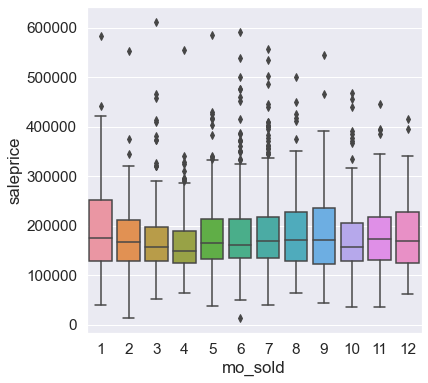

In [335]:
# Drawing a Boxplot to see Mo Sold and SalePrice
plt.figure(figsize=(6,6))
ms = sns.boxplot(x="mo_sold", y="saleprice", data=train_eda)
ms.set_xticklabels(ms.get_xticklabels(), rotation=0);

In [336]:
train_eda['mo_sold'].value_counts()

6     350
7     303
5     257
4     208
3     167
8     167
10    122
9     108
2     104
11    103
1      78
12     78
Name: mo_sold, dtype: int64

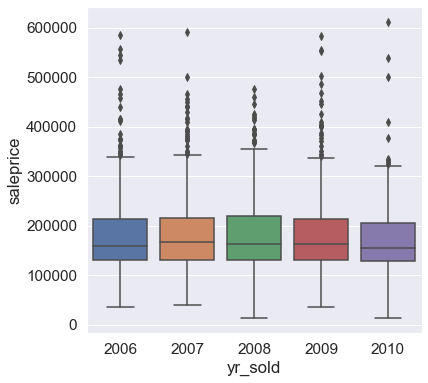

In [337]:
# Drawing a Boxplot to see Yr Sold and SalePrice
plt.figure(figsize=(6,6))
ms = sns.boxplot(x="yr_sold", y="saleprice", data=train_eda)
ms.set_xticklabels(ms.get_xticklabels(), rotation=0);

In [338]:
train_eda['yr_sold'].value_counts()

2007    493
2009    446
2006    438
2008    434
2010    234
Name: yr_sold, dtype: int64

**Decision:**
- Dropping both as the median sale price is not really affected much by when the house was sold by year or month

In [339]:
# Dropping Sold in Train and Test
train_eda.drop(["mo_sold"], axis=1, inplace=True)
test_eda.drop(["mo_sold"], axis=1, inplace=True)
train_eda.drop(["yr_sold"], axis=1, inplace=True)
test_eda.drop(["yr_sold"], axis=1, inplace=True)

# 73. Sale Type

Sale Type (Nominal): Type of sale

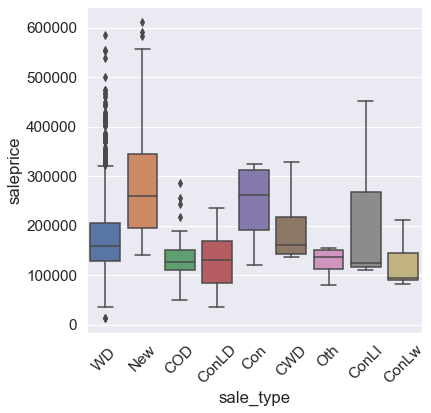

In [340]:
# Drawing a Boxplot to see Sale Type and SalePrice
plt.figure(figsize=(6,6))
st = sns.boxplot(x="sale_type", y="saleprice", data=train_eda)
st.set_xticklabels(st.get_xticklabels(), rotation=45);

In [341]:
train_eda['sale_type'].value_counts()

WD       1778
New       157
COD        63
ConLD      17
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: sale_type, dtype: int64

**Decision:**
- Keeping this as new houses sell for a higher price than others

# Features Selected for Modelling

In [342]:
train_eda.columns

Index(['id', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'land_contour', 'neighborhood', 'condition_1', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'total_bsmt_sf', 'heating_qc', 'central_air',
       'electrical', 'gr_liv_area', 'bsmt_full_bath', 'full_bath',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'garage_finish', 'garage_cars', 'garage_area', 'garage_qual',
       'garage_cond', 'paved_drive', 'sale_type', 'saleprice'],
      dtype='object')

In [343]:
train_eda.shape

(2045, 51)

In [344]:
test_eda.shape

(878, 50)

- 31 features removed during EDA

# Exporting Cleaned Data Sets post EDA

In [345]:
# Exporting Cleaned Training Data post EDA
train_eda.to_csv('../project_2/datasets/train_eda.csv')
# Exporting Cleaned Training Data post EDA
test_eda.to_csv('../project_2/datasets/test_eda.csv')